# Mundo 1 - O que é matplotlib

In [1]:
import matplotlib.pyplot as plt

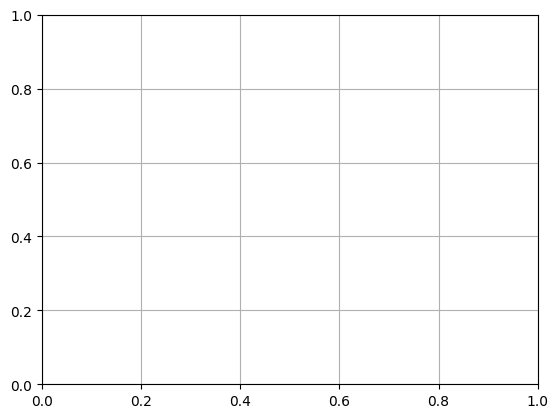

In [2]:
fig ,ax = plt.subplots()

ax.grid(True)
plt.show()

In [3]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.DataFrame({'x':np.random.random(5),
                  'y':np.random.random(5),
                  }
                  )

df

x         y
0  0.093973  0.051991
1  0.890360  0.595707
2  0.354532  0.687458
3  0.314254  0.144294
4  0.961130  0.907652

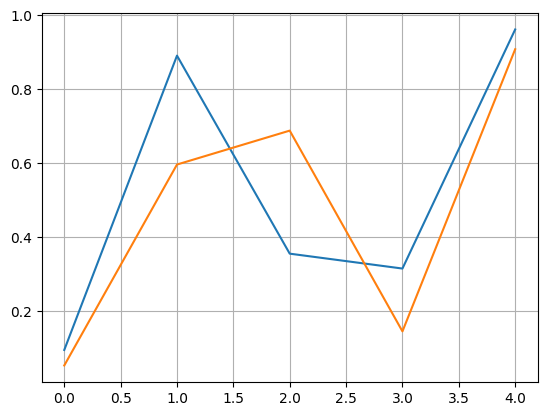

In [6]:
fig, ax = plt.subplots()

ax.plot(df.index, df['x'])
ax.plot(df.index, df['y'])
ax.grid(True)






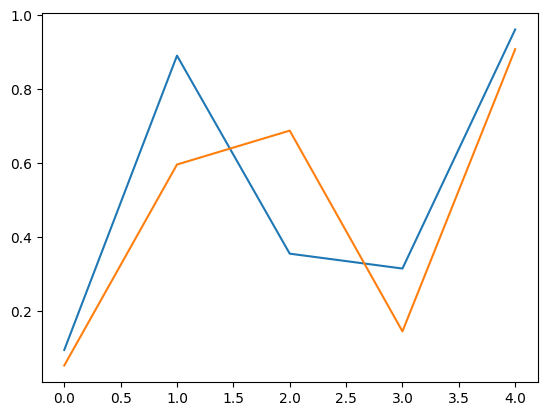

In [7]:
plt.plot(df)

#Mundo 2 - Pyplot: Como criar gráficos de linha, barras e histogramas com o Pandas

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 

In [9]:
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    
                 }

plt.rcParams.update(params)

# Método pyplot

In [10]:
x = ["1T", "2T", "3T", "4T"]
y = [2000, 2200, 1100, 3540]

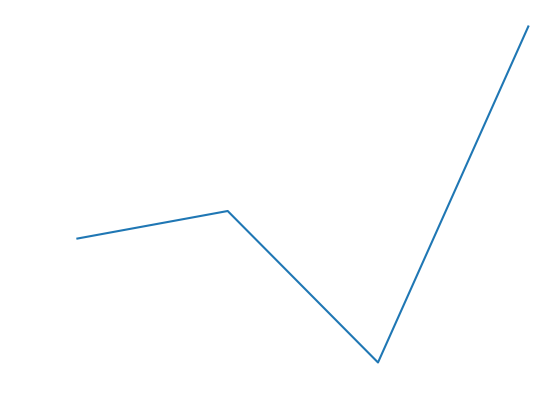

In [11]:
plt.plot(x,y)

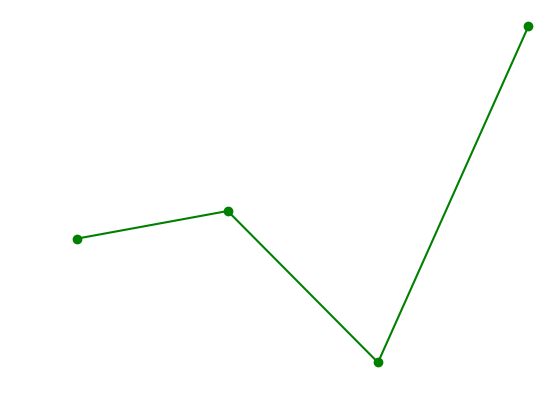

In [12]:
plt.plot(x,y, color="green", marker='o')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

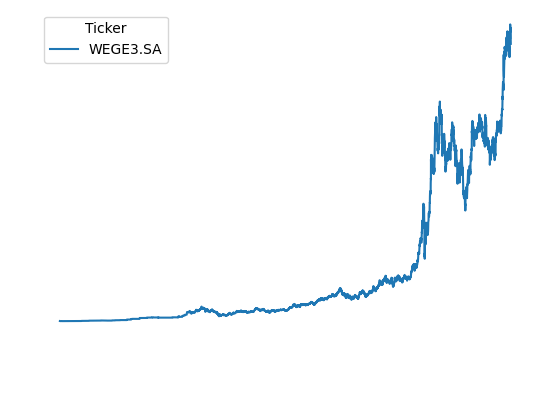

In [13]:
cotacoes = yf.download("WEGE3.SA")['Adj Close']

cotacoes.plot()

In [14]:
df = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

df = ((df.pct_change().dropna()) + 1).cumprod() -1 

df 


[*********************100%***********************]  4 of 4 completed


Ticker      LREN3.SA   PETR4.SA   VALE3.SA    WEGE3.SA
Date                                                  
2000-01-05  0.000000  -0.010090   0.000000    0.000000
2000-01-06  0.000000  -0.013514   0.000000   -0.090910
2000-01-07  0.000000  -0.009009   0.036585   -0.090910
2000-01-10  0.000000   0.011351   0.121951   -0.090910
2000-01-11  0.000000  -0.013514   0.124390   -0.090910
...              ...        ...        ...         ...
2024-12-17 -0.997543  29.410290  37.253320  499.502020
2024-12-18 -0.997685  28.624229  36.367038  492.154388
2024-12-19 -0.997609  28.505128  35.658011  487.054276
2024-12-20 -0.997532  28.258986  36.237503  479.101571
2024-12-23 -0.997617  28.219286  36.257957  472.087633

[6272 rows x 4 columns]

<Axes: xlabel='Date'>

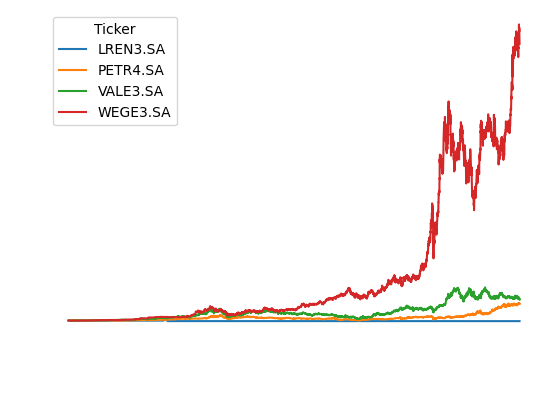

In [15]:
df.plot()

<Axes: xlabel='dias'>

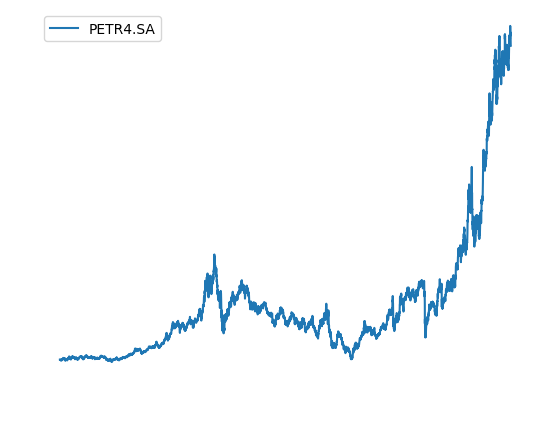

In [18]:
df_mudando_coluna =  df.copy()
df_mudando_coluna['dias'] = list(range(0, len(df)))

df_mudando_coluna.plot(x='dias', y = 'PETR4.SA' )


# Outros tipos de gráficos: barra, histogramas, área, dispersão, pizza...

Para criar esses outros tipos de gráficos, basta utilizar o argumento "kind" e espeficicar o gráfico.

### Gráfico de barra com a performance acumulada das ações

<Axes: xlabel='Ticker'>

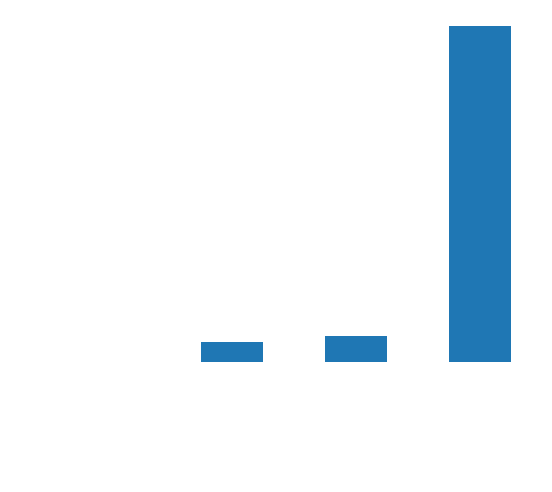

In [19]:
df.iloc[-1].plot(kind="bar")

### Gráfico de barra empilhado com a performance acumulada das ações ano a ano

Essa é uma ótima forma de vizualizar como os dados evoluíram ao longo do tempo. Qual % do total eles representavam antes e atualmente. É muito utilizado pra comércio internacional

/tmp/ipykernel_8751/462132246.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual = df.resample("Y").last()


<Axes: >

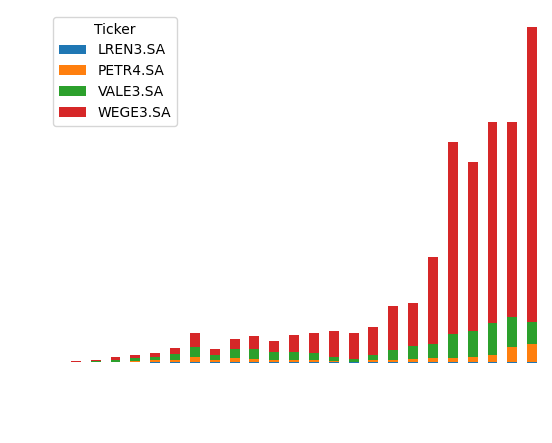

In [21]:
df_anual = df.resample("Y").last()

df_anual.index = [2000,20001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017, 2018, 2019, 2020, 2021, 2022, 2023,2024]

df_anual.plot.bar(stacked = True)





<Axes: >

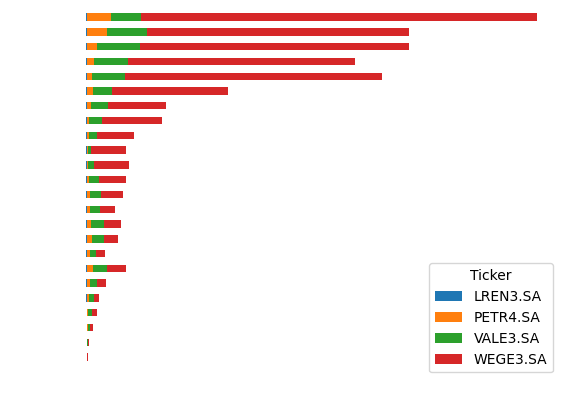

In [22]:
df_anual.plot.barh(stacked = True)

# Gráfico de área

Uma outra forma de visualizar isso são com gráficos de área.

In [23]:
qtd_acoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Volume']
preco_original = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']



[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [24]:
volume = qtd_acoes * preco_original
volume

Ticker          LREN3.SA      PETR4.SA      VALE3.SA      WEGE3.SA
Date                                                              
2000-01-03           NaN  2.079130e+11  2.049600e+06  6.383998e+04
2000-01-04  0.000000e+00  1.601810e+11  2.673200e+06  7.699957e+03
2000-01-05  0.000000e+00  2.364266e+11  6.412399e+06  0.000000e+00
2000-01-06  0.000000e+00  1.864548e+11  2.705999e+06  3.699975e+04
2000-01-07  0.000000e+00  1.150195e+11  1.893800e+07  1.999987e+04
...                  ...           ...           ...           ...
2024-12-17  2.857436e+08  1.517339e+09  1.289834e+09  5.443700e+08
2024-12-18  2.305472e+08  2.168696e+09  1.899616e+09  5.774544e+08
2024-12-19  2.076331e+08  1.607854e+09  1.587823e+09  5.097660e+08
2024-12-20  2.292944e+08  2.184372e+09  3.545903e+09  7.905175e+08
2024-12-23  9.635650e+07  5.167910e+08  3.839630e+08  7.519746e+07

[6274 rows x 4 columns]

/tmp/ipykernel_8751/3455003837.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volume = volume.resample("M").mean()


<Axes: xlabel='Date'>

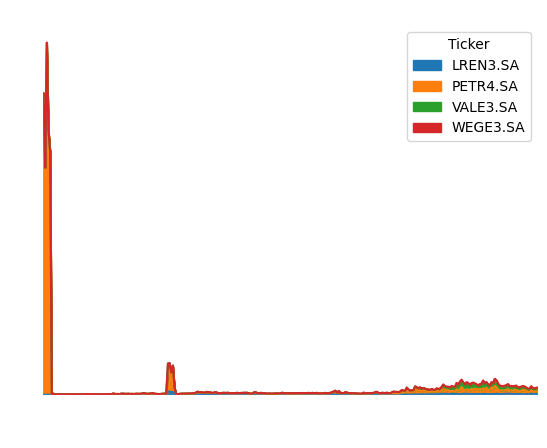

In [25]:
volume = volume.resample("M").mean()
volume.plot.area()

/tmp/ipykernel_8751/285169611.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volume = volume.dropna().resample("M").mean()


<Axes: xlabel='Date'>

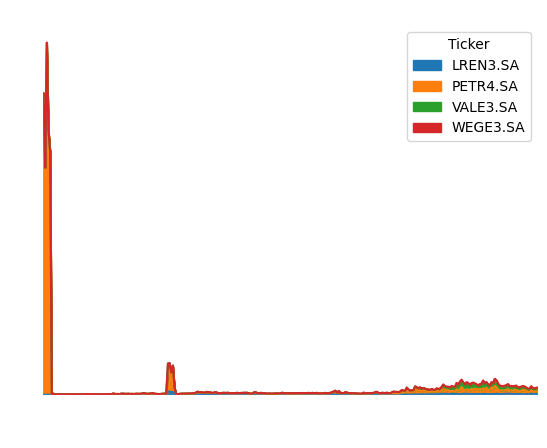

In [26]:
volume = volume.dropna().resample("M").mean()
volume.plot.area()


### Histograma de retornos diários

[*********************100%***********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

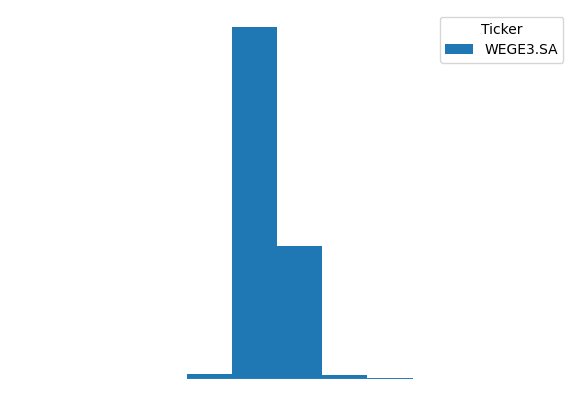

In [28]:
cotacoes = yf.download("WEGE3.SA")['Adj Close']

retornos_diarios = cotacoes.pct_change().dropna()

retornos_diarios.plot.hist()

<Axes: ylabel='Frequency'>

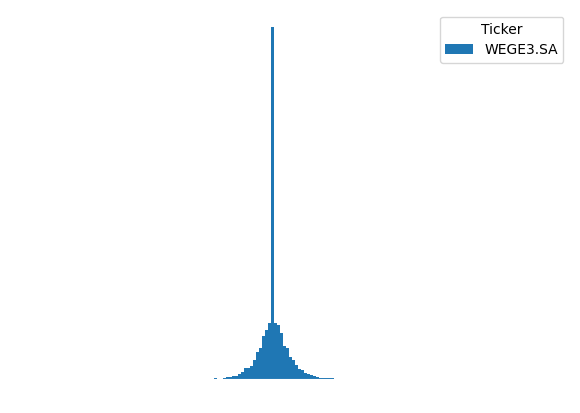

In [30]:
retornos_diarios.plot.hist(bins=150)

# Boxsplot

Graças a Deus você não está na faculdade e não precisa fazer essa merda na mão.

![image.png](attachment:image.png)

In [32]:
cotacoes = yf.download(["^BVSP", "USDBRL=X"])['Close']

cotacoes - cotacoes.resample("Y").last().pct_change().dropna()

cotacoes['ano'] = cotacoes.index.year 
cotacoes['ano'] = cotacoes['ano'].astype("category")

cotacoes.columns = ["Ibovespa", "Dólar", "Ano"]

cotacoes


[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_8751/1634281654.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cotacoes - cotacoes.resample("Y").last().pct_change().dropna()
/tmp/ipykernel_8751/1634281654.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cotacoes - cotacoes.resample("Y").last().pct_change().dropna()


Ibovespa          Dólar   Ano
Date                                     
1993-04-27       NaN      24.500000  1993
1993-04-28       NaN      24.299999  1993
1993-04-29       NaN      23.700001  1993
1993-04-30       NaN      24.100000  1993
1993-05-03       NaN      24.100000  1993
...              ...            ...   ...
2024-12-17    6.1473  124698.000000  2024
2024-12-18    6.1032  120772.000000  2024
2024-12-19    6.2889  121188.000000  2024
2024-12-20    6.1516  122102.000000  2024
2024-12-23       NaN  120935.140625  2024

[8096 rows x 3 columns]

<Axes: xlabel='Dólar', ylabel='Ibovespa'>

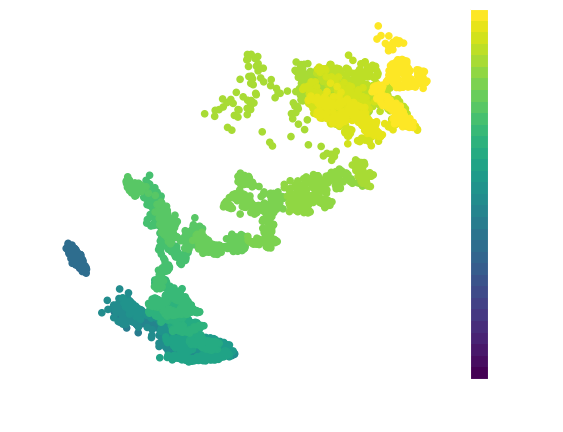

In [33]:
cotacoes.plot.scatter(x="Dólar", y="Ibovespa",c="Ano", cmap="viridis")

# Exercícios

* Exercício 89: Mande o usuário digitar o código de 3 empresas da bolsa. Devolva pra ele:

        - Um gráfico de linha com a trajetória das cotações das empresas.
        - Um gráfico de área com o volume de cada ação.
        - Um gráfico boxsplot com os retornos mensais de cada ação.
        - Três gráficos de dispersão entre as ações e o ibovespa pra cada ano. 

[*********************100%***********************]  4 of 4 completed
/tmp/ipykernel_8751/390374500.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()
/tmp/ipykernel_8751/390374500.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volume = volume.resample("M").last()
/tmp/ipykernel_8751/390374500.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()
/tmp/ipykernel_8751/390374500.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anual = cotacoes_empresas.resample("Y").last().pct_change().dropna()


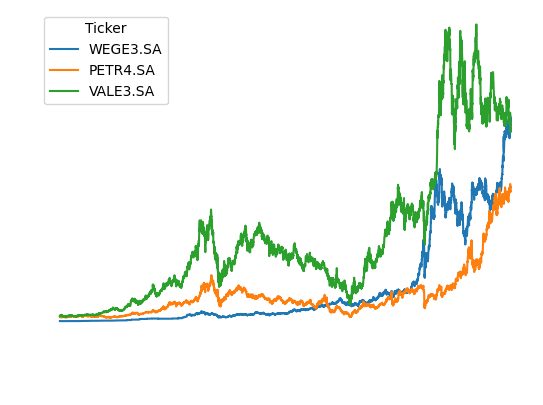

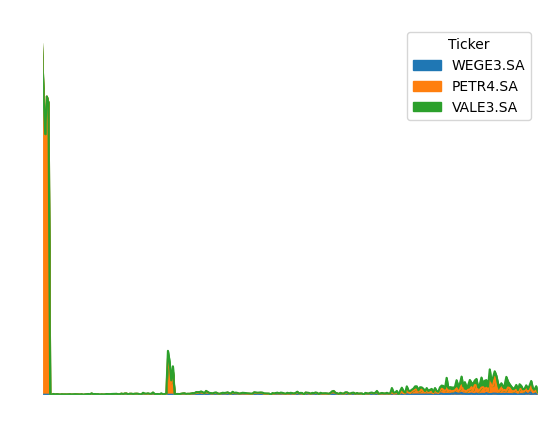

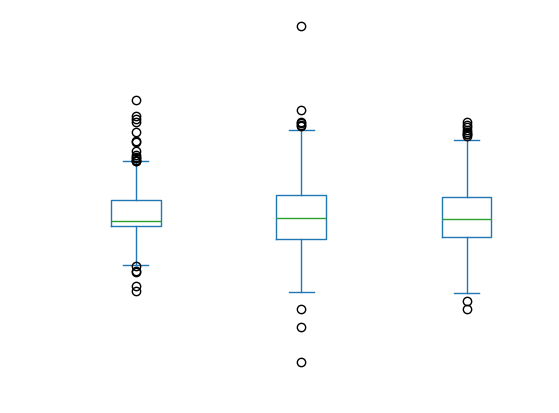

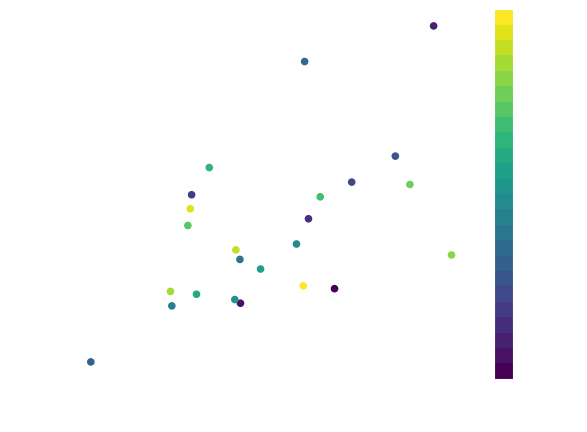

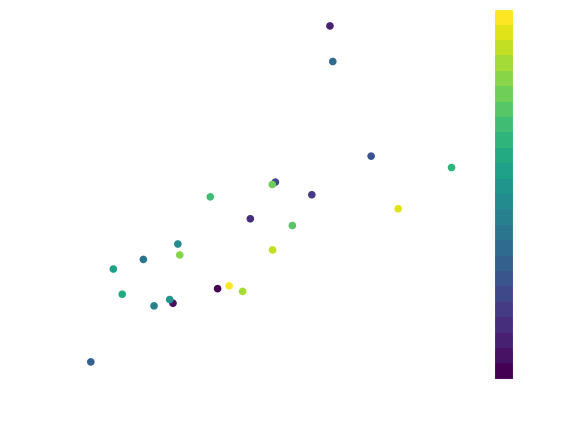

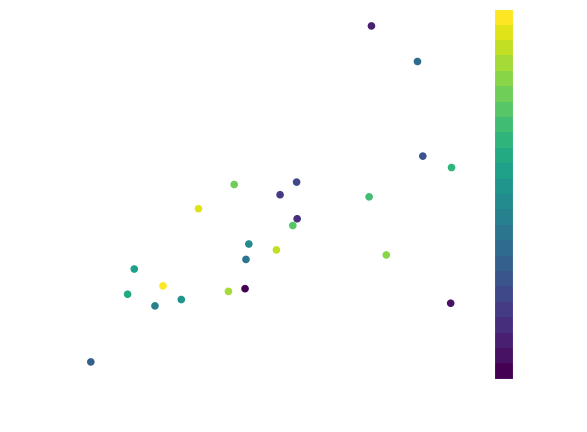

In [54]:
#gabarito 89

#acao1 = str(input("Escolha a 1º ação: "))
#acao2 = str(input("Escolha a 2º ação: "))
#acao3 = str(input("Escolha a 3º ação: "))
acao1 = "WEGE3"
acao2 = "PETR4"
acao3 = "VALE3"

lista_acoes = [acao1, acao2, acao3]

lista_acoes = [acao + ".SA" for acao in lista_acoes]

lista_acoes.append("^BVSP")

base_dados = yf.download(lista_acoes)

base_dados = base_dados.dropna()

lista_acoes.remove("^BVSP")

ibovespa = base_dados['Adj Close']['^BVSP']

retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()

cotacoes_empresas = base_dados['Adj Close'][lista_acoes]

cotacoes_empresas_original = base_dados['Close'][lista_acoes]

qtd_acoes = base_dados['Volume'][lista_acoes]

volume = cotacoes_empresas_original * qtd_acoes

volume = volume.resample("M").last()

retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()

retornos_anual = cotacoes_empresas.resample("Y").last().pct_change().dropna()

cotacoes_empresas.plot()

volume.plot.area()

retornos_mensais.plot.box()

for acao in lista_acoes:
    
    df = pd.DataFrame({acao: retornos_anual[acao],
                      'Ibovespa': retorno_anual_ibov}, index = retorno_anual_ibov.index)
    
    df['Ano'] = df.index.year
    df['Ano'] = df['Ano'].astype("category")
    
    df.plot.scatter(x = acao, y = "Ibovespa", c = "Ano",  cmap = "viridis")
                     
    
    

# Mundo 3 - Figuras e eixos: Como criar mosaicos com o Matplotlib

In [55]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [56]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}

plt.rcParams.update(params)

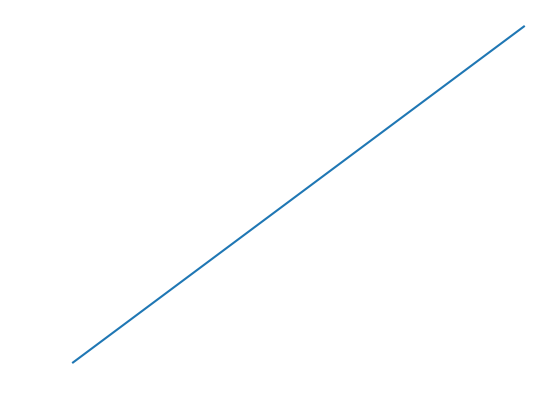

In [57]:
fig, ax = plt.subplots()

ax.plot([2,4,6],[1,2,3])

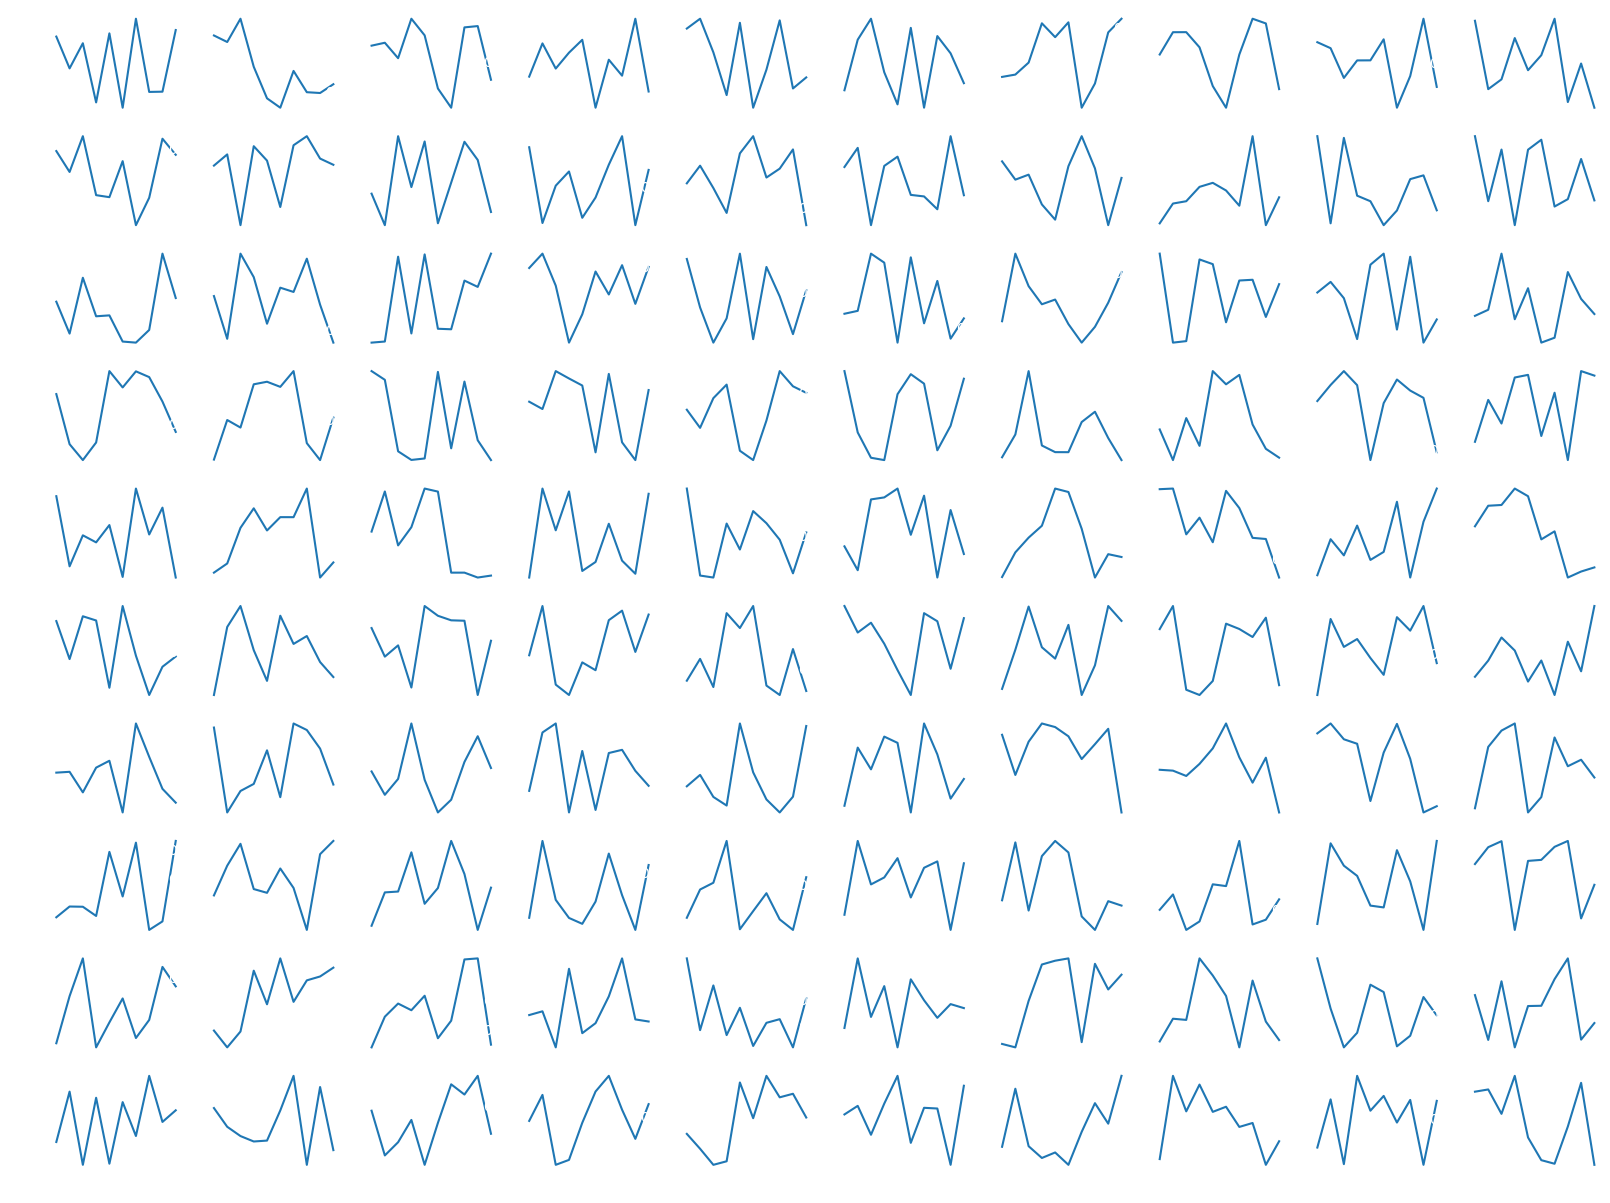

In [60]:
fig, ax = plt.subplots(10,10,figsize=(20,15))

for i in range(10):
    for j in range(10):
        ax[i,j].plot(np.random.random(10))
        
plt.show()

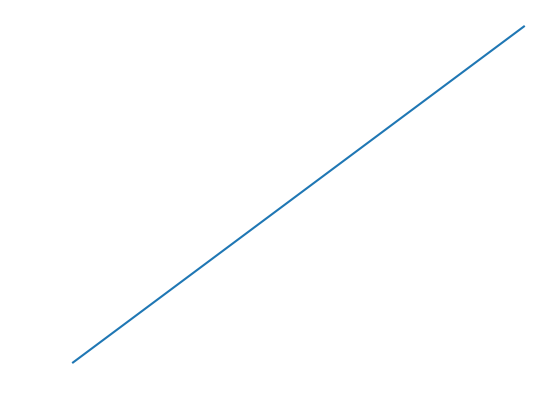

In [61]:
fig, ax = plt.subplots()

ax.plot([10,20,30],[40,50,60])

[*********************100%***********************]  1 of 1 completed


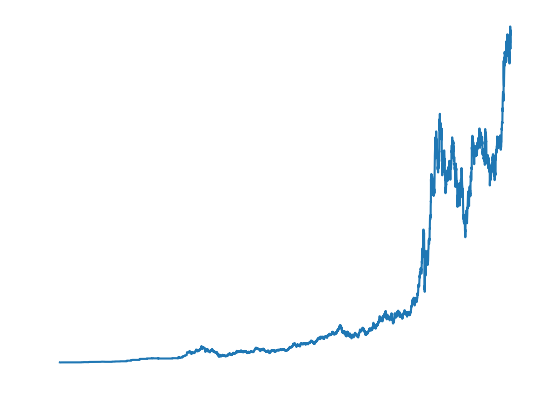

In [62]:
cotacao_weg = yf.download("WEGE3.SA")['Adj Close']

fig, ax = plt.subplots()

ax.plot(cotacao_weg.index, cotacao_weg.values)

<Axes: xlabel='Date'>

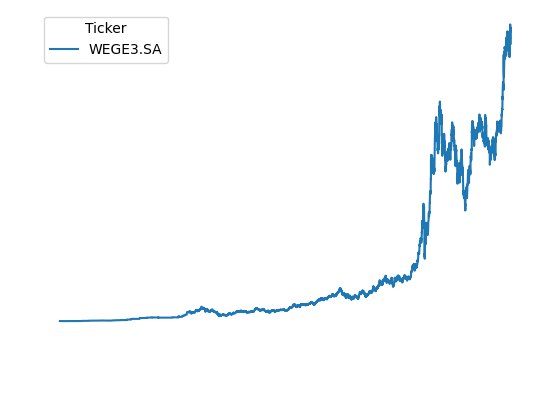

In [63]:
cotacao_weg.plot()

[*********************100%***********************]  4 of 4 completed


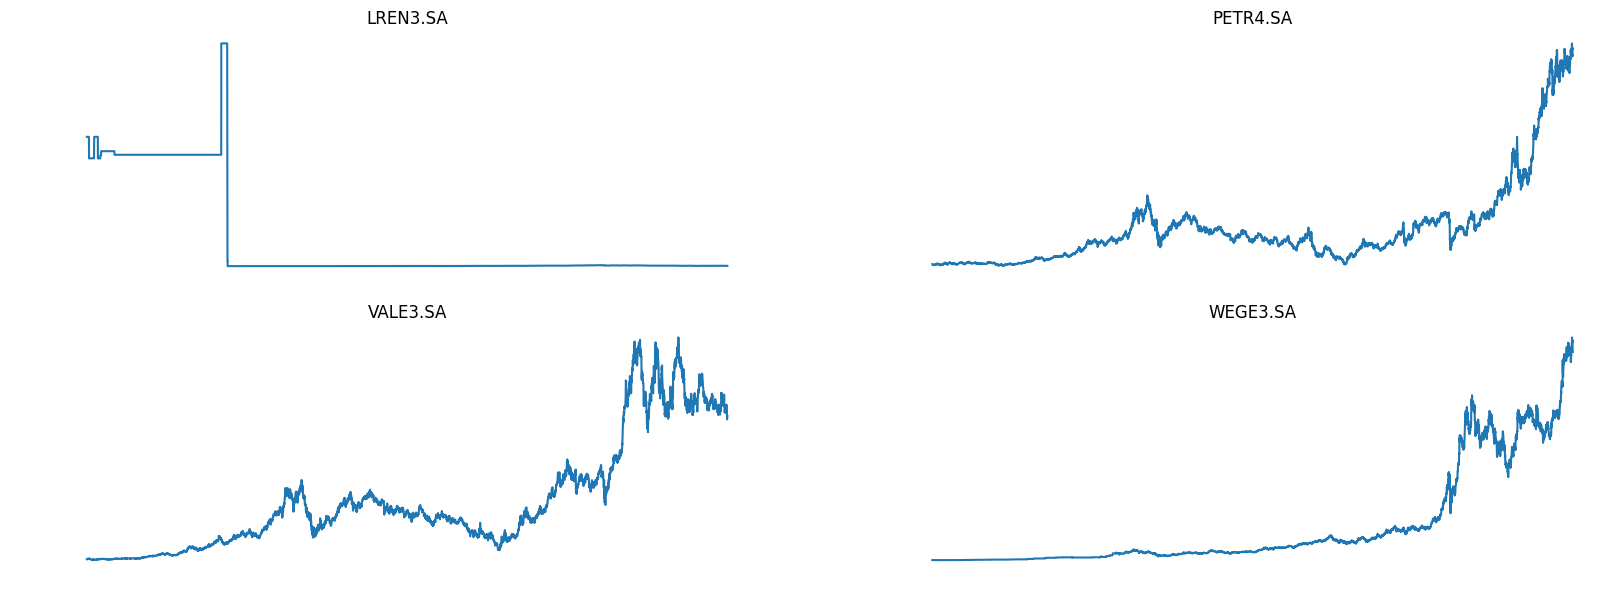

In [66]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']


fig, ax = plt.subplots(2,2, figsize=(20,7))

coluna = 0

for i in range(2):
    for j in range(2):
        ax[i,j].plot(cotacoes.index, cotacoes.iloc[:,coluna])
        ax[i,j].set_title(cotacoes.columns[coluna])
        coluna = coluna +1 

In [67]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

# Exercícios 

* Exercício 90: Crie uma figura e um eixo genérico dentro do Python.
* Exercício 91: Peça para o usuário inserir o nome de 3 ações e crie o gráfico de cotações das 3 ações e o do ibovespa em um quadrante 2x2.

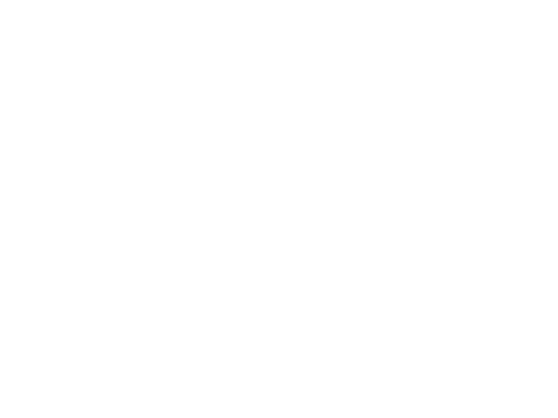

In [69]:
#* Exercício 90: Crie uma figura e um eixo genérico dentro do Python.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

[*********************100%***********************]  4 of 4 completed


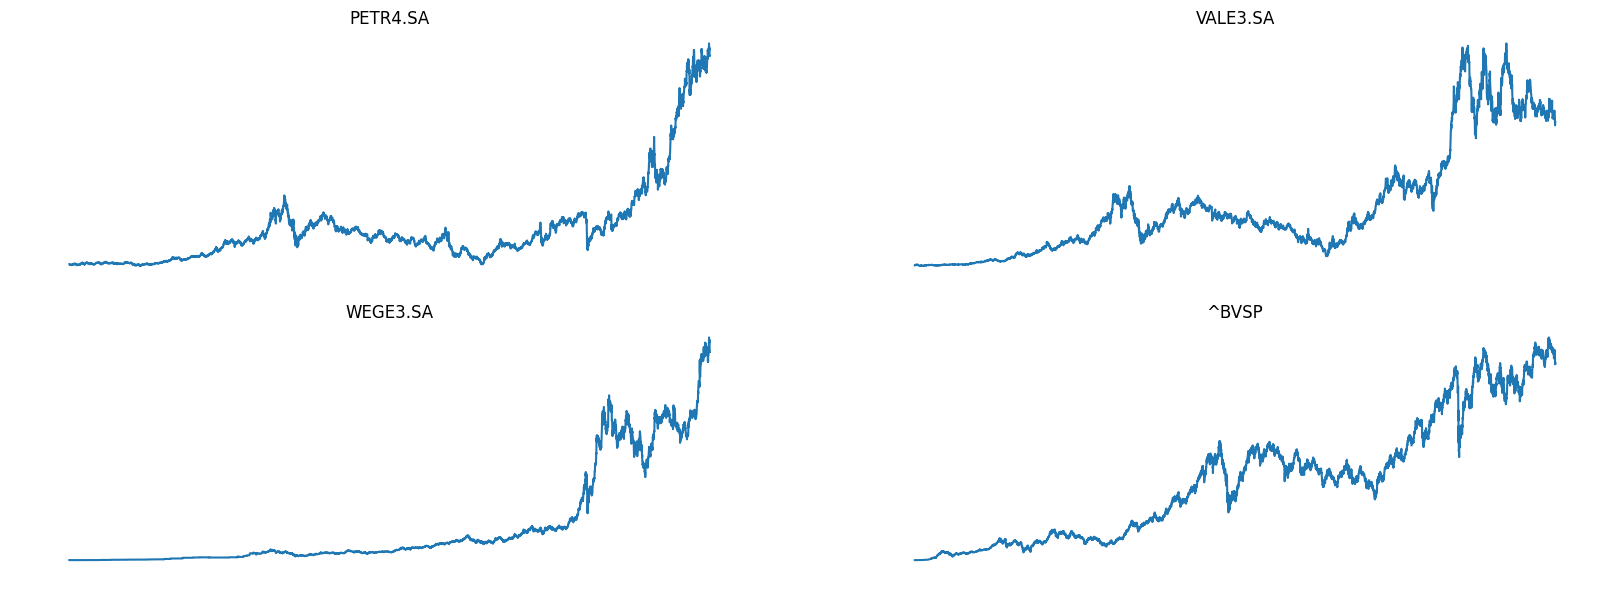

In [ ]:
#Exercício 91: Peça para o usuário inserir o nome de 3 ações e crie o gráfico de cotações das 3 ações e o do ibovespa em um quadrante 2x2.
import yfinance as yf 
#acao1 = str(input("1s ação:"))
#acao2 = str(input("2s ação:"))
#acao3 = str(input("3s ação:"))
acao1 ="WEGE3" 
acao2 ="PETR4"
acao3 ="VALE3"
 


acoes = [acao1,acao2,acao3]
acoes = [acao + ".SA" for acao in acoes]

acoes.append("^BVSP")

dados = yf.download(acoes)['Adj Close']


fig, ax = plt.subplots(2,2, figsize=(20,7))

coluna = 0

for i in range(2):
    for j in range(2):
        ax[i,j].plot(dados.index, dados.iloc[:,coluna])
        ax[i,j].set_title(dados.columns[coluna])
        coluna = coluna +1 


# Mundo 4 - Rótulos: Como configurar legendas para os eixos X e Y?

In [83]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf

In [84]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}

plt.rcParams.update(params)

[*********************100%***********************]  1 of 1 completed


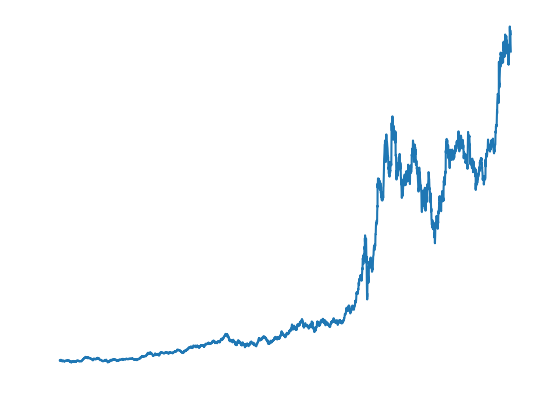

In [19]:
cotacao_weg = yf.download("WEGE3.SA", "2010-01-01")['Adj Close']

fig, ax = plt.subplots()

ax.plot(cotacao_weg.index, cotacao_weg.values)

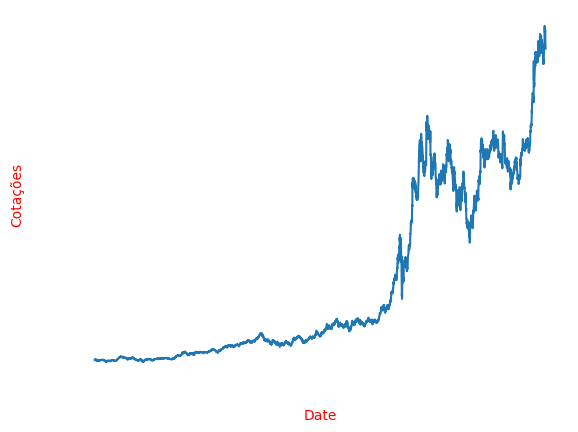

In [89]:
fig, ax = plt.subplots()

ax.plot(cotacao_weg.index, cotacao_weg.values)
ax.set_ylabel("Cotações", labelpad= 15, color='r')
ax.set_xlabel("Date", color="r")

plt.show()

# Exercícios

* Exercício 92: Mande o usuário escolher o código de uma ação e puxe o último ano. Crie um gráfico de cotação da ação no último ano e, caso a ação tenha ficado positiva, legende o eixo y com "Cotação não dá ré". Caso a rentabilidade tenha sido negativa, bota a legenda "Cotação afundando". Legende também o eixo X com o texto "Sou sardinha olhando curto prazo". Utilize 15 de labelpad e 12 de fontsize.

[*********************100%***********************]  1 of 1 completed


0.5035301845610456


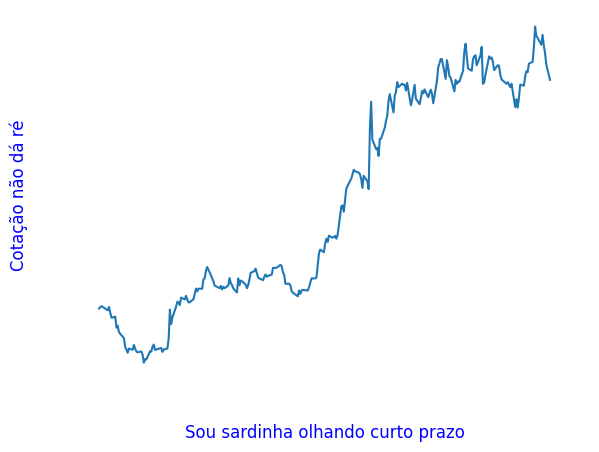

In [ ]:
#* Exercício 92: Mande o usuário escolher o código de uma ação e puxe o último ano. Crie um gráfico de cotação da ação no último ano e, caso a ação tenha ficado positiva, legende o eixo y com "Cotação não dá ré". Caso a rentabilidade tenha sido negativa, bota a legenda "Cotação afundando". Legende também o eixo X com o texto "Sou sardinha olhando curto prazo". Utilize 15 de labelpad e 12 de fontsize.


import yfinance as yf
from datetime import datetime 
from datetime import timedelta 
import matplotlib.pyplot as plt

#acao = str(input("Ação:"))

acao = "WEGE3"

acao = acao + ".SA"

um_ano = datetime.now() - timedelta(days=365)

dados = yf.download(acao, um_ano)['Adj Close']
values  = dados.values 




rentabilidade = dados.iloc[-1][acao]/dados.iloc[0][acao] - 1

print(rentabilidade)

fig, ax = plt.subplots()

if( rentabilidade > 0):
    ax.plot(dados.index, dados.values)
    ax.set_ylabel("Cotação não dá ré", labelpad=15, fontsize=12, color="b")
    ax.set_xlabel("Sou sardinha olhando curto prazo", labelpad=15, fontsize=12, color="b")
else:
    ax.plot(dados.index, dados.values)
    ax.set_ylabel("Cotação afundando", labelpad=15, fontsize=12, color="r")
    ax.set_xlabel("Sou sardinha olhando curto prazo", labelpad=15, fontsize=12, color="r")
    
     
plt.show()





# Mundo 5 - Título: Como configurar o título do gráfico?

In [112]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf

In [113]:
params =  {"ytick.color": "w",
           "xtick.color":"w",
           "axes,labelcolor": "w",
           "axes.edgecolor": "w"}

#plt.rcParams.update(params)

TypeError: 'RcParams' object is not callable

[*********************100%***********************]  1 of 1 completed


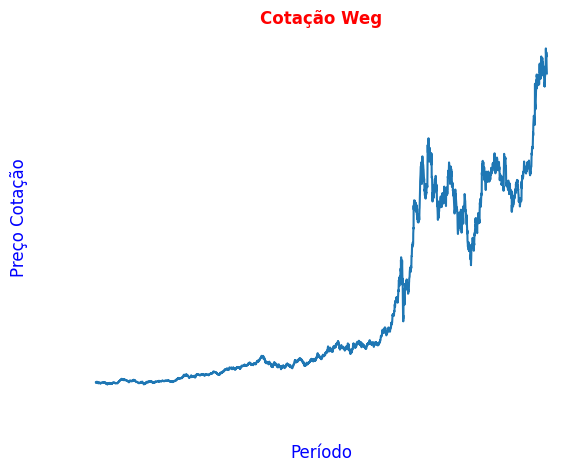

In [124]:

acao = "WEGE3.SA"
dados = yf.download(acao, "2010-01-01")['Adj Close']

fig, ax = plt.subplots()

ax.plot(dados.index, dados.values)
ax.set_ylabel("Preço Cotação", labelpad=13, fontsize = 12, color="b")
ax.set_xlabel("Período", labelpad=13, fontsize = 12, color="b")
ax.set_title("Cotação Weg", fontweight="bold", color="r")

plt.show()


# Mundo 6 - Zoom e Escala: Como criar eixos fixos e colocar o gráfico em escala Logaritma?

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf
from datetime import datetime 
from datetime import timedelta 

In [48]:
params = {
    "ytick.color": "black",
    "xtick.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black"
}

plt.rcParams.update(params)


In [16]:
acoes = ["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"]

cotacoes = yf.download(acoes)['Adj Close']

cotacoes

[*********************100%***********************]  4 of 4 completed


Ticker         LREN3.SA   PETR4.SA   VALE3.SA   WEGE3.SA
Date                                                    
2000-01-03          NaN   1.328274   1.471468   0.119719
2000-01-04  5439.040039   1.254796   1.436433   0.115518
2000-01-05  5439.040039   1.242134   1.436433   0.115518
2000-01-06  5439.040039   1.237839   1.436433   0.105016
2000-01-07  5439.040039   1.243491   1.488985   0.105016
...                 ...        ...        ...        ...
2024-12-17    13.370000  38.299999  56.110001  57.816849
2024-12-18    12.600000  37.310001  54.810001  56.968067
2024-12-19    13.010000  37.160000  53.770000  56.378914
2024-12-20    13.430000  36.849998  54.619999  55.460236
2024-12-23    12.630000  36.860001  54.849998  54.240002

[6274 rows x 4 columns]

[*********************100%***********************]  4 of 4 completed


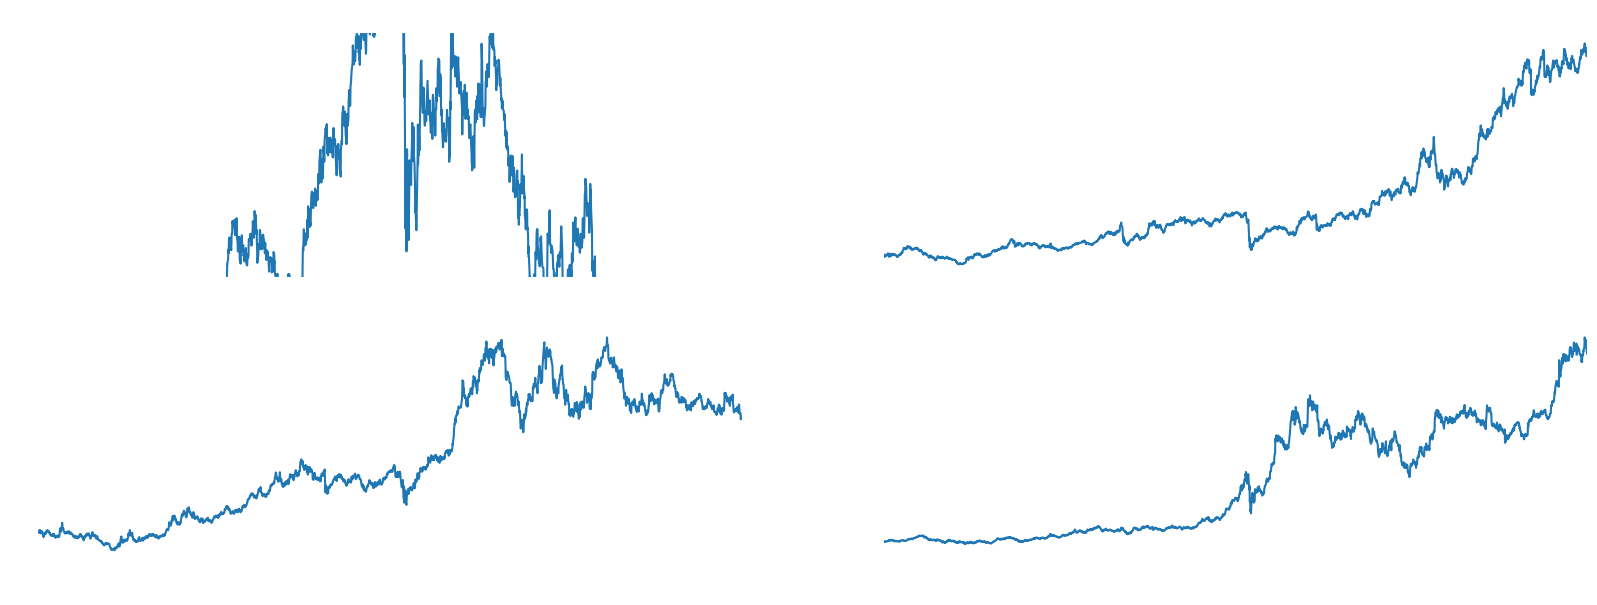

In [21]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

um_ano_atras = datetime.now() - timedelta(days = 3650)

fig, ax = plt.subplots(2, 2, figsize = (20, 7))

coluna = 0

for i in range(2):
    for j in range(2):
        
        ax[i, j].set_xlim(um_ano_atras, datetime.now())
        #ax[i, j].set_xlim("2010-01-01", datetime.now())
        
        if cotacoes.columns[coluna] == "LREN3.SA":
        
            ax[i, j].set_ylim(20, 35)
        
        ax[i, j].plot(cotacoes.index, cotacoes.iloc[:, coluna])
        ax[i, j].set_title(cotacoes.columns[coluna], color = "w")
        
        coluna = coluna + 1

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


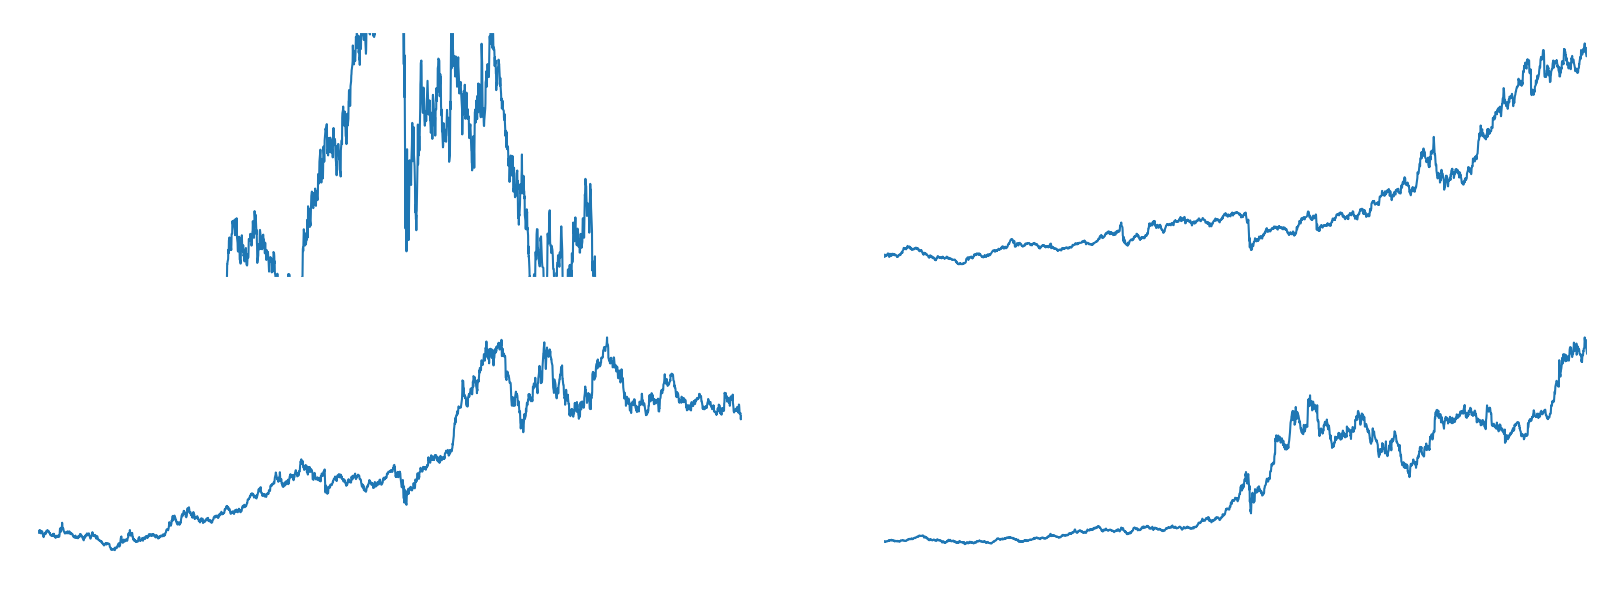

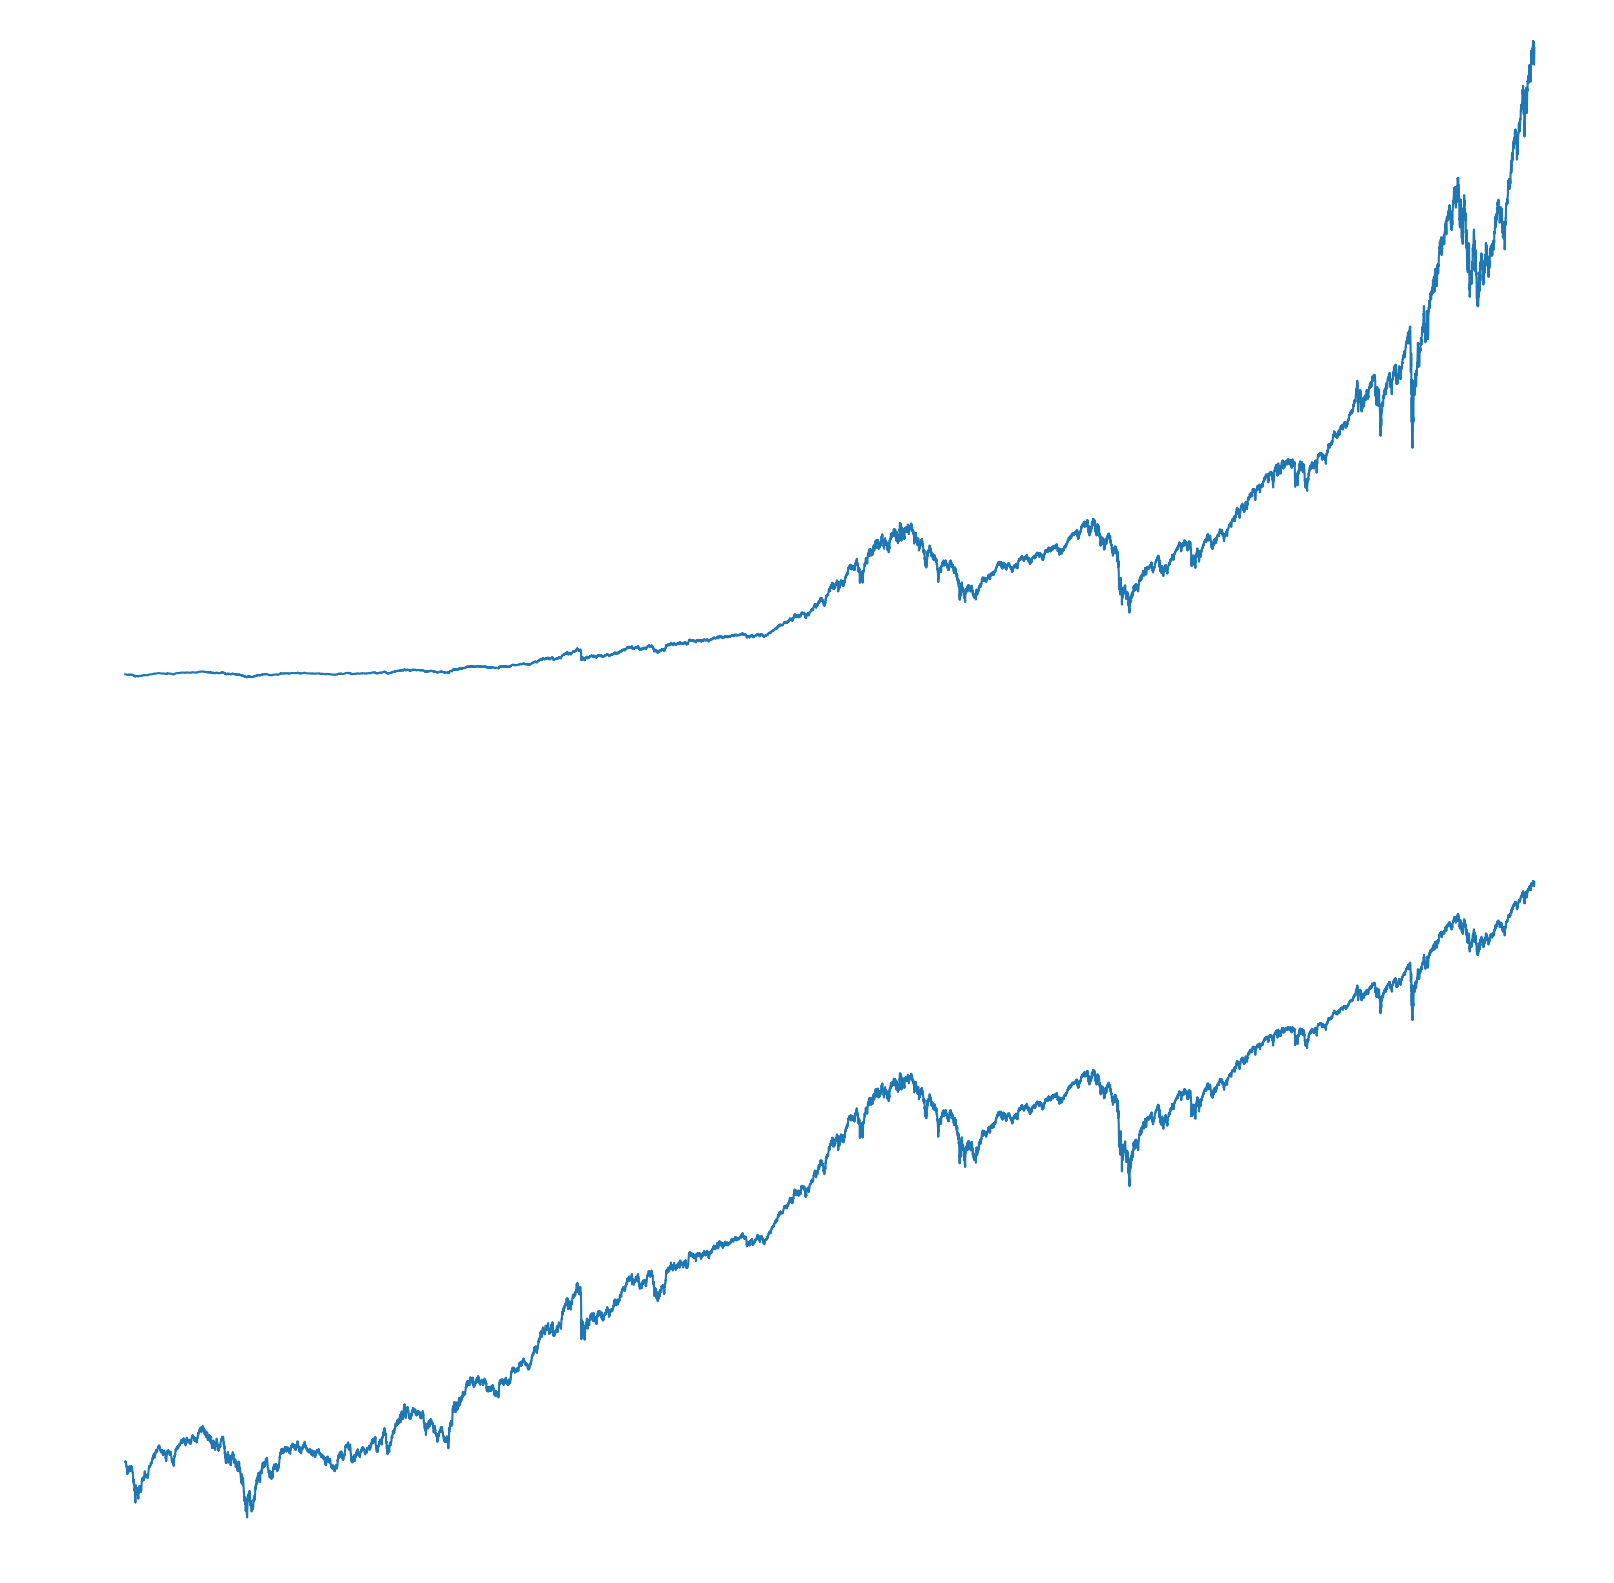

In [22]:


acoes = ["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"]

cotacoes = yf.download(acoes)['Adj Close']

um_ano_atras = datetime.now() - timedelta(days=3650)

fig, ax = plt.subplots(2,2,figsize = (20,7))

coluna = 0

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim(um_ano_atras,datetime.now())
        
        if (cotacoes.columns[coluna] == "LREN3.SA"):
            ax[i,j].set_ylim(20,35)
            
        ax[i,j].plot(cotacoes.index, cotacoes.iloc[:,coluna])
        ax[i,j].set_title(cotacoes.columns[coluna], color="w")
        
        coluna = coluna +1 
        
        
cotacoes = yf.download(["^GSPC"], "1970-01-01")['Adj Close']

fig, ax = plt.subplots(2,1,figsize = (20,20))

ax[0].plot(cotacoes.index, cotacoes.values)
ax[1].plot(cotacoes.index, cotacoes.values)
ax[1].set_yscale('log')
        
        

[*********************100%***********************]  1 of 1 completed


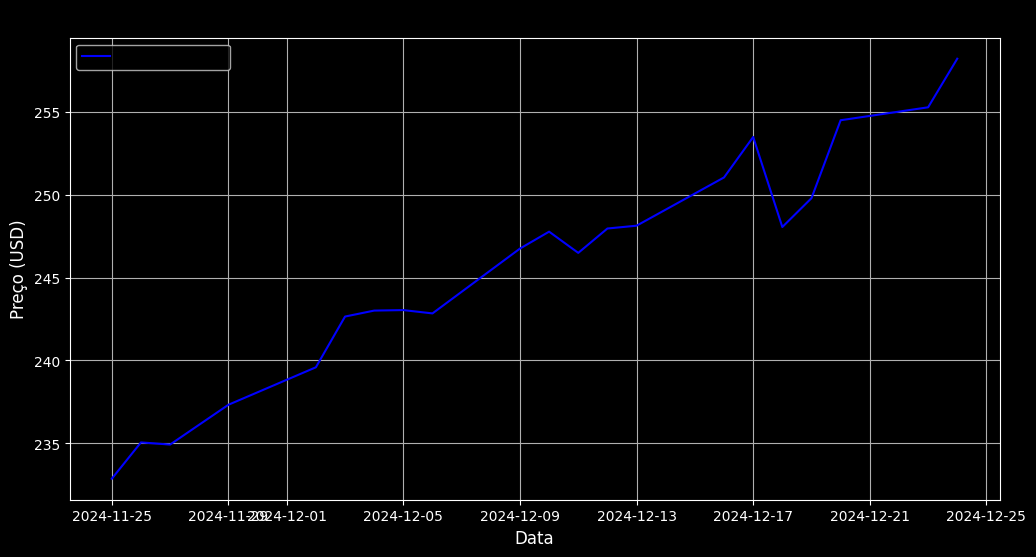

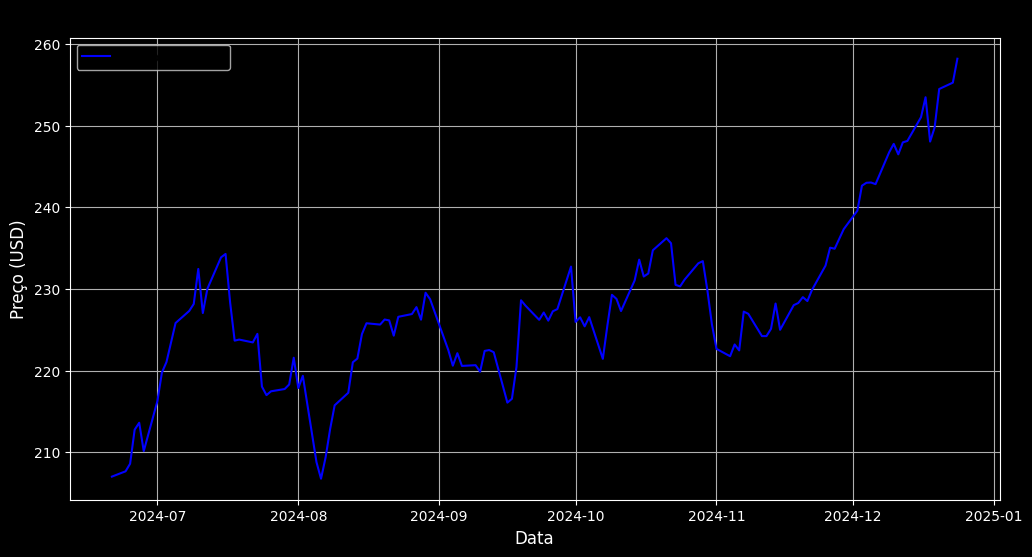

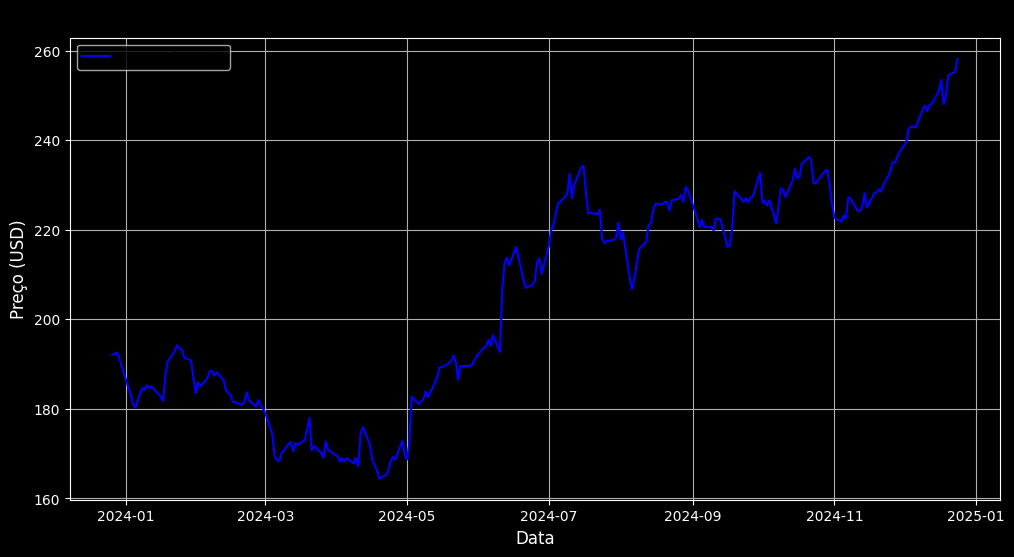

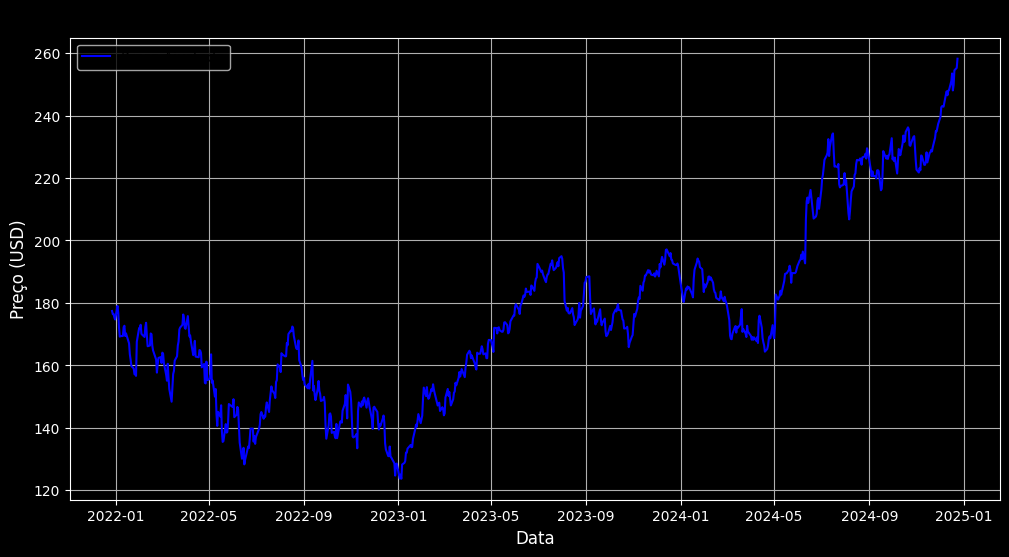

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Configurações para fundo escuro (use a opção desejada acima)
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "axes.facecolor": "k",
    "figure.facecolor": "k"
}
plt.rcParams.update(params)
# Baixar os dados de uma ação (exemplo: 'AAPL')
acao = 'AAPL'
cotacoes = yf.download(acao)['Adj Close']

# Datas de referência
n = datetime.now()
um_ano = n - timedelta(days=365)
seis_meses = n - timedelta(days=31*6)
um_mes = n - timedelta(days=31)
tres_anos = n - timedelta(days=365*3)

# Selecionar os períodos
cotacoes_ultimo_mes = cotacoes[um_mes.strftime('%Y-%m-%d'):]
cotacoes_ultimos_seis_meses = cotacoes[seis_meses.strftime('%Y-%m-%d'):]
cotacoes_ultimo_ano = cotacoes[um_ano.strftime('%Y-%m-%d'):]
cotacoes_ultimos_tres_anos = cotacoes[tres_anos.strftime('%Y-%m-%d'):]

# Função para plotar
def plot_cotacoes(cotacoes_periodo, titulo):
    plt.figure(figsize=(12, 6))
    plt.plot(cotacoes_periodo.index, cotacoes_periodo.values, label='Preço Ajustado', color='blue')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Preço (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotar os períodos selecionados
plot_cotacoes(cotacoes_ultimo_mes, 'Cotações - Último Mês')
plot_cotacoes(cotacoes_ultimos_seis_meses, 'Cotações - Últimos Seis Meses')
plot_cotacoes(cotacoes_ultimo_ano, 'Cotações - Último Ano')
plot_cotacoes(cotacoes_ultimos_tres_anos, 'Cotações - Últimos Três Anos')


[*********************100%***********************]  1 of 1 completed


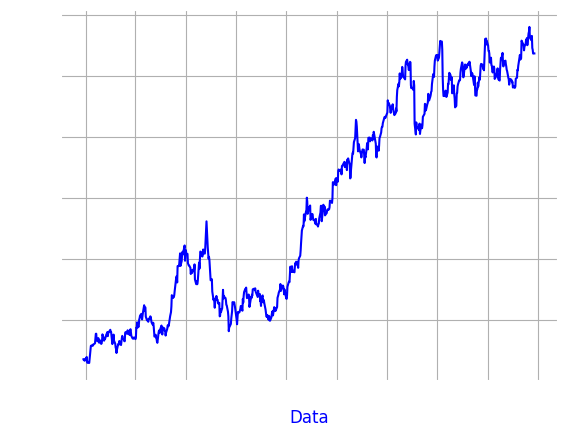

In [46]:
cotacoes = yf.download(acao)['Adj Close']

n = datetime.now()


um_ano = n - timedelta(days = 365)
seis_meses = n - timedelta(days = 31*6)
um_mes = n - timedelta(days = 31)
tres_anos = n - timedelta(days = 365*3)
cotacoes.columns
cotacoes_ultimo_mes = cotacoes[um_mes.strftime('%Y-%m-%d'):]
cotacoes_ultimos_seis_meses = cotacoes[seis_meses.strftime('%Y-%m-%d'):]
cotacoes_ultimo_ano = cotacoes[um_ano.strftime('%Y-%m-%d'):]
cotacoes_ultimos_tres_anos = cotacoes[tres_anos.strftime('%Y-%m-%d'):]
plt.xlabel('Data', fontsize=12, color="b")
plt.ylabel('Preço (USD)', fontsize=12)
plt.grid(True)

plt.plot(cotacoes_ultimos_tres_anos.index, cotacoes_ultimos_tres_anos, color="b")
plt.show()



# Exercícios

* Exercício 94: Mande o usuário escolher uma ação. Em seguida, crie 4 gráficos de cotação da ação com os seguintes períodos: 3 anos, 1 ano, 6 meses 1 mês. Ajuste o gráfico tanto no eixo X quanto no eixo Y.
* Exercício 95: Puxe as cotações do ibovespa desde 1994 e trace dois gráficos: um na escala linear e outro na logaritma. 

[*********************100%***********************]  1 of 1 completed


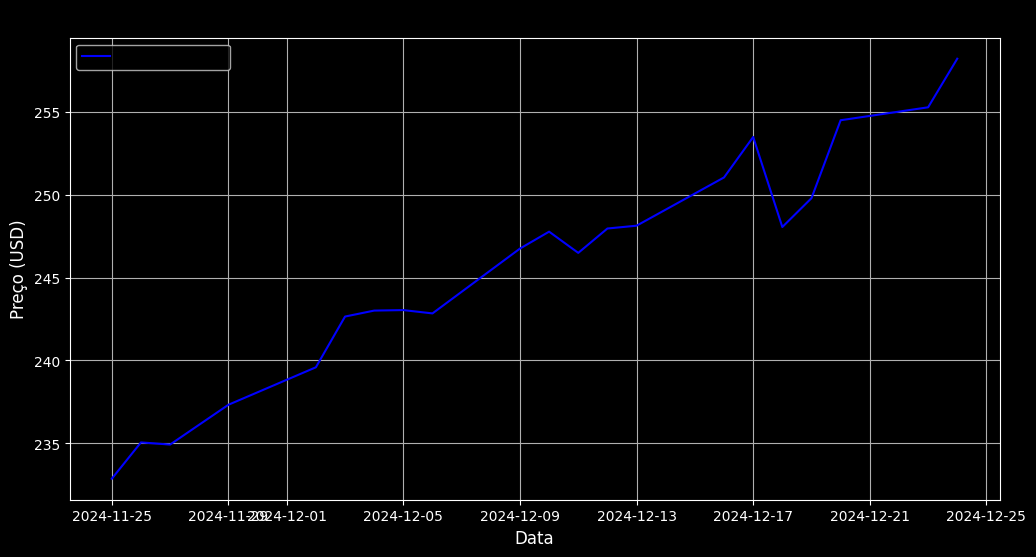

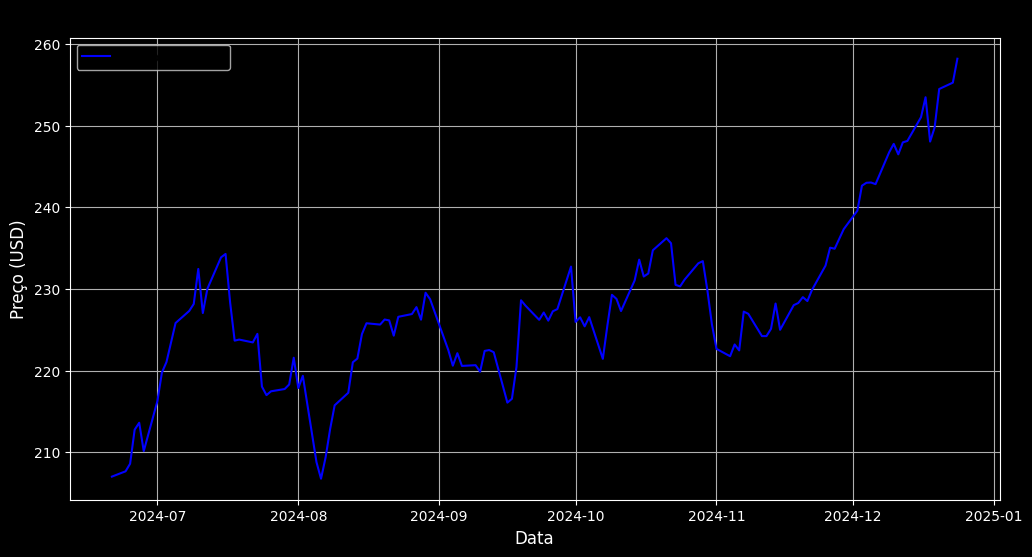

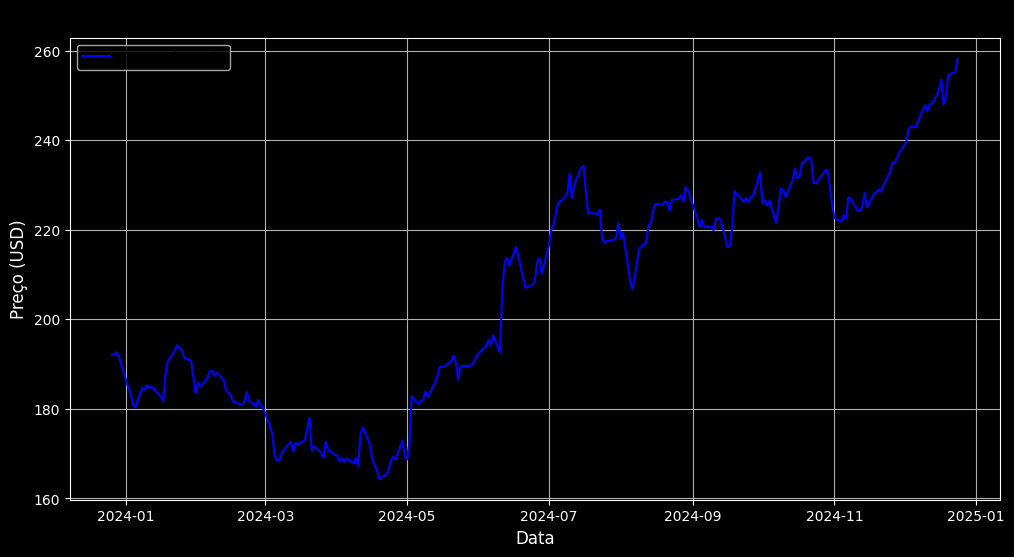

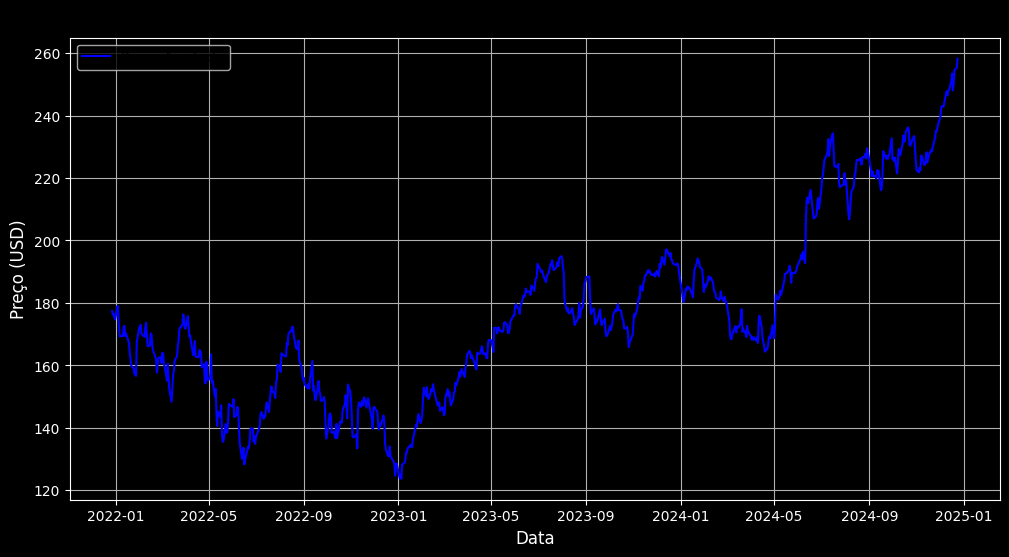

In [52]:
#* Exercício 94: Mande o usuário escolher uma ação. Em seguida, crie 4 gráficos de cotação da ação com os seguintes períodos: 3 anos, 1 ano, 6 meses 1 mês. Ajuste o gráfico tanto no eixo X quanto no eixo Y.
#acao = str(input())

import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Configurações para fundo escuro (use a opção desejada acima)
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "axes.facecolor": "k",
    "figure.facecolor": "k"
}
plt.rcParams.update(params)
# Baixar os dados de uma ação (exemplo: 'AAPL')
acao = 'AAPL'
cotacoes = yf.download(acao)['Adj Close']

# Datas de referência
n = datetime.now()
um_ano = n - timedelta(days=365)
seis_meses = n - timedelta(days=31*6)
um_mes = n - timedelta(days=31)
tres_anos = n - timedelta(days=365*3)

# Selecionar os períodos
cotacoes_ultimo_mes = cotacoes[um_mes.strftime('%Y-%m-%d'):]
cotacoes_ultimos_seis_meses = cotacoes[seis_meses.strftime('%Y-%m-%d'):]
cotacoes_ultimo_ano = cotacoes[um_ano.strftime('%Y-%m-%d'):]
cotacoes_ultimos_tres_anos = cotacoes[tres_anos.strftime('%Y-%m-%d'):]

# Função para plotar
def plot_cotacoes(cotacoes_periodo, titulo):
    plt.figure(figsize=(12, 6))
    plt.plot(cotacoes_periodo.index, cotacoes_periodo.values, label='Preço Ajustado', color='blue')
    plt.title(titulo, fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Preço (USD)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotar os períodos selecionados
plot_cotacoes(cotacoes_ultimo_mes, 'Cotações - Último Mês')
plot_cotacoes(cotacoes_ultimos_seis_meses, 'Cotações - Últimos Seis Meses')
plot_cotacoes(cotacoes_ultimo_ano, 'Cotações - Último Ano')
plot_cotacoes(cotacoes_ultimos_tres_anos, 'Cotações - Últimos Três Anos')




[*********************100%***********************]  1 of 1 completed


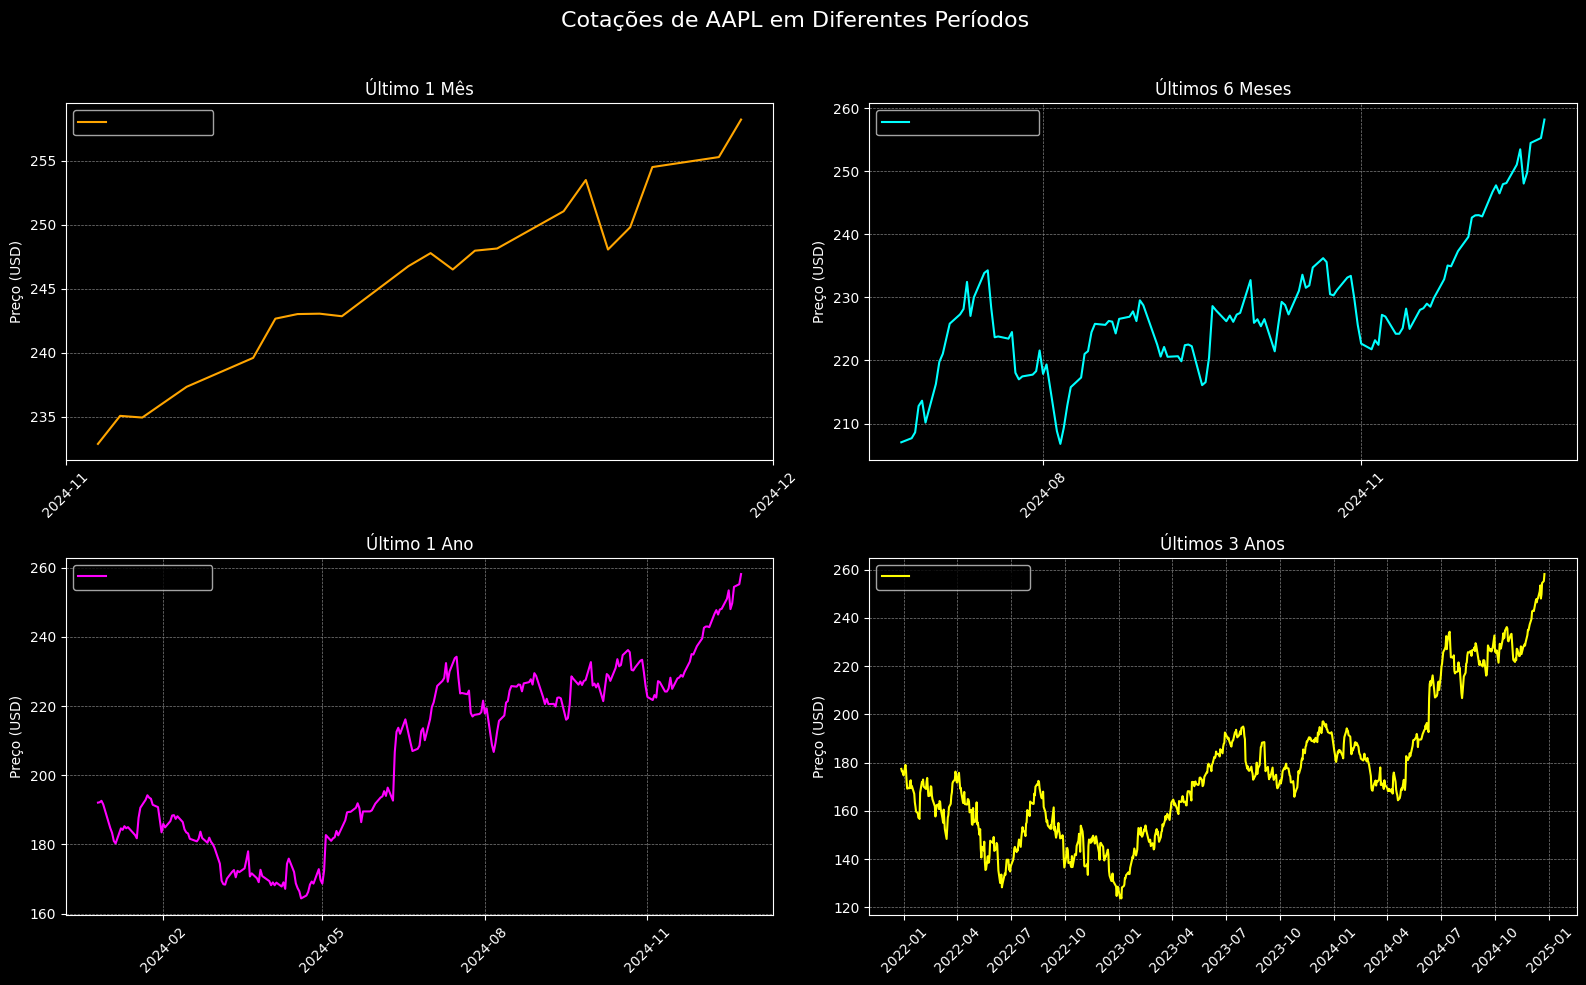

In [54]:
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Baixar dados
acao = 'AAPL'
cotacoes = yf.download(acao)['Adj Close']

# Selecionar períodos
n = datetime.now()
um_mes = n - timedelta(days=31)
seis_meses = n - timedelta(days=31*6)
um_ano = n - timedelta(days=365)
tres_anos = n - timedelta(days=365*3)

cotacoes_um_mes = cotacoes[um_mes.strftime('%Y-%m-%d'):]
cotacoes_seis_meses = cotacoes[seis_meses.strftime('%Y-%m-%d'):]
cotacoes_um_ano = cotacoes[um_ano.strftime('%Y-%m-%d'):]
cotacoes_tres_anos = cotacoes[tres_anos.strftime('%Y-%m-%d'):]

# Função para criar cada subplot
def plot_subplot(ax, dados, titulo, cor):
    ax.plot(dados.index, dados.values, label=titulo, color=cor)
    ax.set_title(titulo, fontsize=12, color='white')
    ax.set_ylabel('Preço (USD)', fontsize=10, color='white')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.tick_params(axis='x', rotation=45)

# Configuração da figura e layout
def plot_all(rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(16, 10), sharex=False)
    fig.suptitle('Cotações de AAPL em Diferentes Períodos', fontsize=16, color='white')

    # Fundo escuro
    params = {
        "ytick.color": "w",
        "xtick.color": "w",
        "axes.labelcolor": "w",
        "axes.edgecolor": "w",
        "axes.facecolor": "k",
        "figure.facecolor": "k"
    }
    plt.rcParams.update(params)

    # Dados e rótulos
    periodos = [
        (cotacoes_um_mes, 'Último 1 Mês', 'orange'),
        (cotacoes_seis_meses, 'Últimos 6 Meses', 'cyan'),
        (cotacoes_um_ano, 'Último 1 Ano', 'magenta'),
        (cotacoes_tres_anos, 'Últimos 3 Anos', 'yellow')
    ]

    # Flatten eixos para fácil indexação
    axs = axs.flatten() if rows * cols > 1 else [axs]

    # Plotar cada período no subplot correspondente
    for idx, (dados, titulo, cor) in enumerate(periodos):
        if idx < len(axs):
            plot_subplot(axs[idx], dados, titulo, cor)

    # Remover subplots vazios
   # for idx in range(len(periodos), len(axs)):
    #    fig.delaxes(axs[idx])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar espaçamento
    plt.show()

# Chamar a função com 2 linhas e 2 colunas
plot_all(2, 2)


In [ ]:
#* Exercício 95: Puxe as cotações do ibovespa desde 1994 e trace dois gráficos: um na escala linear e outro na logaritma. 

* Exercício 95: Puxe as cotações do ibovespa desde 1994 e trace dois gráficos: um na escala linear e outro na logaritma. 

[*********************100%***********************]  1 of 1 completed


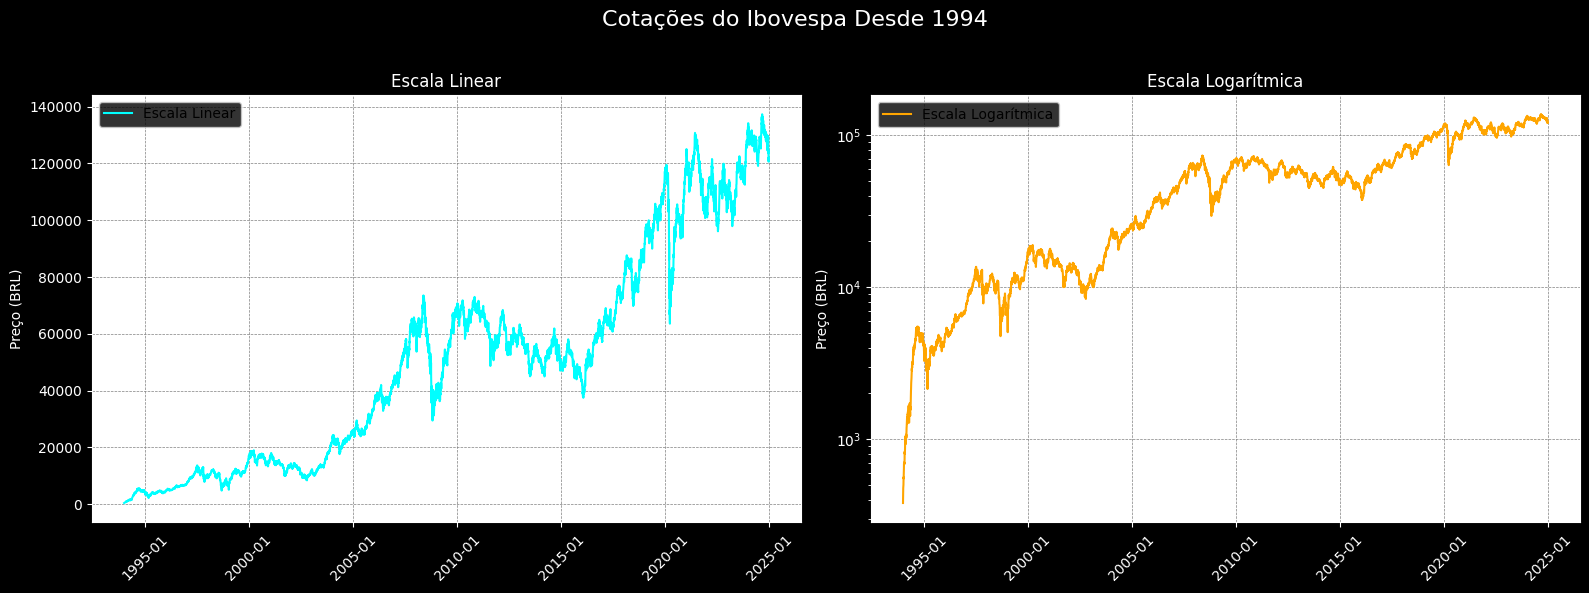

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.dates as mdates
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Baixar dados do Ibovespa desde 1994
ibovespa = yf.download('^BVSP', start='1994-01-01')['Adj Close']

# Função para criar cada subplot
def plot_subplot(ax, dados, titulo, cor, escala='linear'):
    ax.plot(dados.index, dados.values, label=titulo, color=cor)
    ax.set_title(titulo, fontsize=12, color='white')
    ax.set_ylabel('Preço (BRL)', fontsize=10, color='white')
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
    ax.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
    ax.tick_params(axis='x', rotation=45)
    ax.set_yscale(escala)  # Escala linear ou logarítmica

# Configuração da figura e layout
def plot_all_escala(dados):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
    fig.suptitle('Cotações do Ibovespa Desde 1994', fontsize=16, color='white')

    # Fundo escuro
    params = {
        "ytick.color": "w",
        "xtick.color": "w",
        "axes.labelcolor": "w",
        "axes.edgecolor": "w",
        "axes.facecolor": "k",
        "figure.facecolor": "k"
    }
    plt.rcParams.update(params)

    # Gráficos: linear e logarítmico
    plot_subplot(axs[0], dados, 'Escala Linear', 'cyan', escala='linear')
    plot_subplot(axs[1], dados, 'Escala Logarítmica', 'orange', escala='log')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar espaçamento
    plt.show()

# Chamar a função
plot_all_escala(ibovespa)


# Mundo 7 - Legendas: Como criar uma legenda para as informações do gráfico?

In [62]:
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf

In [63]:
    # Fundo escuro
params = {
        "ytick.color": "w",
        "xtick.color": "w",
        "axes.labelcolor": "w",
        "axes.edgecolor": "w",
        "axes.facecolor": "k",
        "figure.facecolor": "k"
    }
plt.rcParams.update(params)

[*********************100%***********************]  4 of 4 completed


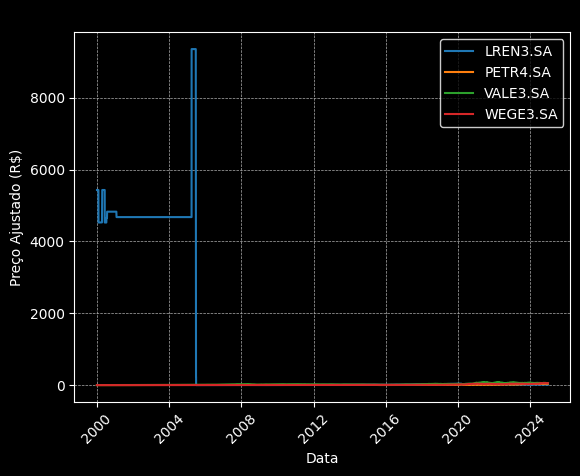

In [72]:
import yfinance as yf
import matplotlib.pyplot as plt

# Baixar as cotações
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

# Criar o gráfico
fig, ax = plt.subplots()

# Adicionar as séries ao gráfico
for empresa in cotacoes.columns:
    ax.plot(cotacoes.index, cotacoes[empresa].values, label=empresa)

# Exibir a legenda no local 'best'
ax.legend(loc='best')  # Alterado para um local válido
legend = ax.legend(loc='best', labelcolor='white', facecolor='black', edgecolor='white')

ax.set_title('Cotações de WEGE3, PETR4, VALE3 e LREN3')
ax.set_xlabel('Data')
ax.set_ylabel('Preço Ajustado (R$)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


[*********************100%***********************]  4 of 4 completed


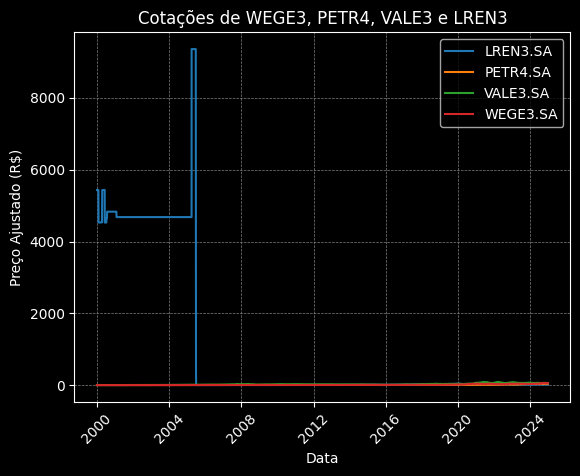

In [74]:
import yfinance as yf
import matplotlib.pyplot as plt

# Configuração de estilo com fundo escuro
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "axes.facecolor": "k",
    "figure.facecolor": "k"
}
plt.rcParams.update(params)

# Baixar as cotações
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

# Criar o gráfico
fig, ax = plt.subplots()

# Adicionar as séries ao gráfico
for empresa in cotacoes.columns:
    ax.plot(cotacoes.index, cotacoes[empresa].values, label=empresa)

# Configurar a legenda com texto branco
#legend = ax.legend(loc='best', labelcolor='white', facecolor='black', edgecolor='white')
legend = ax.legend(loc='best', labelcolor='white')

ax.set_title('Cotações de WEGE3, PETR4, VALE3 e LREN3', color='white')
ax.set_xlabel('Data', color='white')
ax.set_ylabel('Preço Ajustado (R$)', color='white')

plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.show()


[*********************100%***********************]  4 of 4 completed


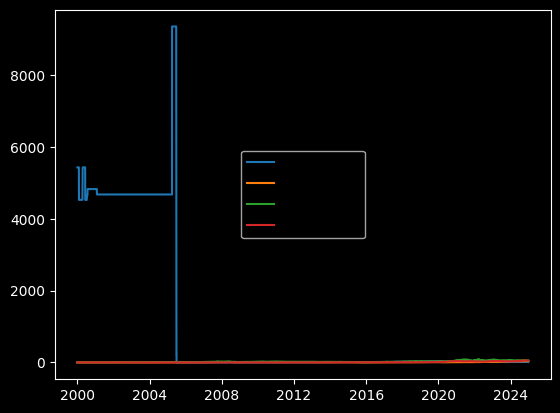

In [66]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

fig, ax = plt.subplots()

for empresa in cotacoes.columns:
    ax.plot(cotacoes.index, cotacoes[empresa].values, label= empresa )
    
ax.legend(loc=10)

# Exercícios

* Exercício 96: Peça para o usuário digitar o código de 4 ações e plote um gráfico de linha com a legenda de cada ação.

[*********************100%***********************]  4 of 4 completed


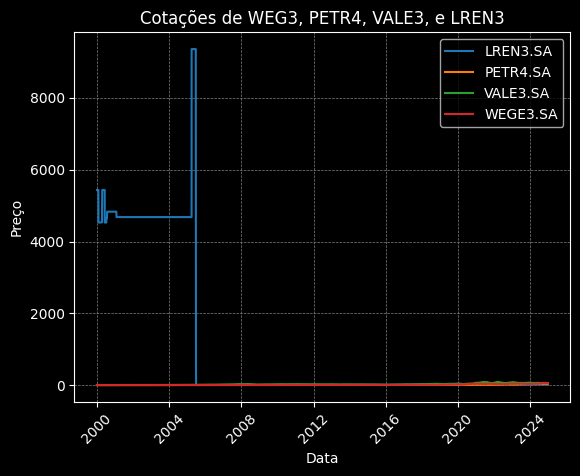

In [83]:
import yfinance as yf
import matplotlib.pyplot as plt

# Configuração de estilo com fundo escuro
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "axes.facecolor": "k",
    "figure.facecolor": "k"
}
plt.rcParams.update(params)

# Baixar as cotações
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Adj Close']

fig, ax = plt.subplots()

for empresa in cotacoes.columns:
    ax.plot(cotacoes.index, cotacoes[empresa].values, label=empresa)

legend = ax.legend(loc="best", labelcolor="white") 
ax.set_title('Cotações de WEG3, PETR4, VALE3, e LREN3', color="white")
ax.set_xlabel('Data', color="white")
ax.set_ylabel('Preço', color="white")


plt.xticks(rotation=45, color="white")
plt.yticks( color="white")
plt.grid(True, linestyle='--', linewidth=.5, color="gray")
   
    






# Mundo 8 - Personalizando eixos: Como transformar o eixo para %, R$ e mudar a frequência dos ticks?

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.dates as mdates


[*********************100%***********************]  1 of 1 completed


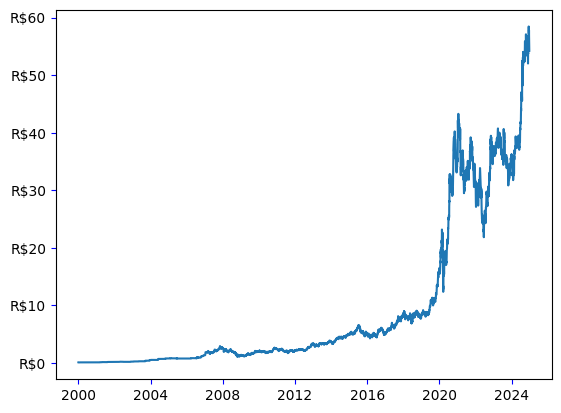

In [11]:
acao = "WEGE3.SA"

cotacoes = yf.download([acao])['Adj Close']
fig,ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)
ax.tick_params(axis='x',color='b')
ax.tick_params(axis='y',color='b')
ax.yaxis.set_major_formatter('R${x:1.0f}')

[*********************100%***********************]  1 of 1 completed


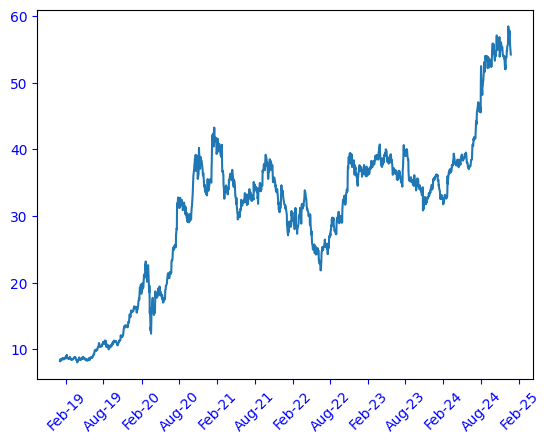

In [ ]:

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.dates as mdates


#Mudando o formato das datas no eixo X

acao = "WEGE3.SA"

#Mudando o formato das datas no eixo X

cotacoes = yf.download([acao], "2019-01-01")['Adj Close']

fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)
minha_formatacao = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(minha_formatacao)

plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')

plt.show()



[*********************100%***********************]  1 of 1 completed


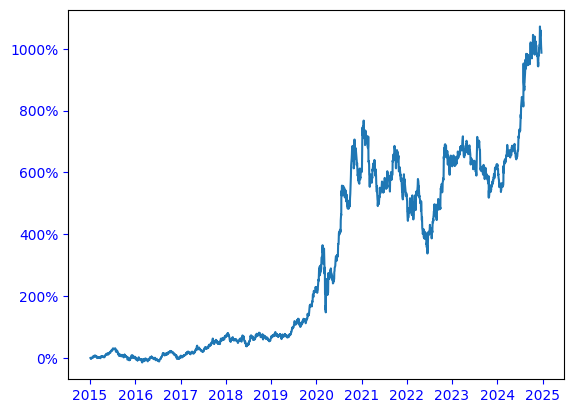

In [25]:
#colocando o eixo em %

import matplotlib.ticker as mtick 

acao = "WEGE3.SA"

cotacoes = yf.download([acao], "2015-01-01")['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acumulados = (1 + retornos).cumprod() -1 

fig, ax = plt.subplots()

ax.tick_params(axis='x',  colors='b')
ax.tick_params(axis='y',  colors='b')

ax.plot(retornos_acumulados.index, retornos_acumulados.values)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))



[*********************100%***********************]  1 of 1 completed


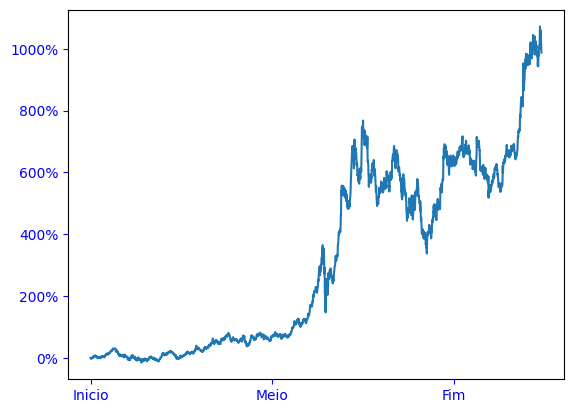

In [33]:
#mudando a frequencia dos ticks que não são datas

acao = "WEGE3.SA"

cotacoes = yf.download([acao], "2015-01-01")['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acumulados = (retornos+1).cumprod() -1 

dias = range(0, len(retornos_acumulados))

fig,ax = plt.subplots()

ax.plot(dias, retornos_acumulados.values)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.tick_params(axis='x',colors="b")
ax.tick_params(axis='y',colors="b")

ax.xaxis.set_ticks([0,1000,2000], ["Inicio", "Meio", "Fim"])






# Exercícios 

* Exercício 97: Puxe os dados de cotação da Petrobras, crie um gráfico da linha com a evolução de cotação e configure o eixo Y como R$. 
* Exercício 98: Com os mesmos dados da Petrobras configure o eixo X para que o intervalo de tempo seja a cada dois anos. Além disso, mude o formato da data para dia-mes-ano.
* Exercício 99: Calcule a rentabilidade acumulada da Petrobras no período, crie um gráfico de performance e configure o eixo X como %.

[*********************100%***********************]  1 of 1 completed


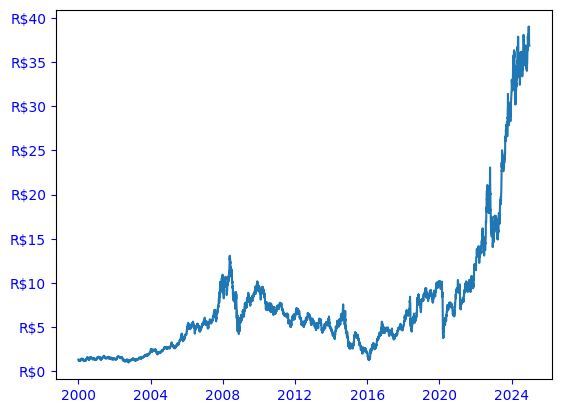

In [42]:
#* Exercício 97: Puxe os dados de cotação da Petrobras, crie um gráfico da linha com a evolução de cotação e configure o eixo Y como R$.
import yfinance as yf
import matplotlib.pyplot as plt
acao = "PETR4.SA"


fig, ax = plt.subplots()
cotacao = yf.download(acao)['Adj Close']

#cotacao

#evolucao = cotacao.pct_change().dropna()

#evolucao = (evolucao +1 ).cumprod() -1 

plt.plot(cotacao.index, cotacao.values)

ax.tick_params(axis='x',colors='b')
ax.tick_params(axis='y',colors='b')
ax.yaxis.set_major_formatter('R${x:1.0f}')








In [ ]:
a=[1]

b = a*3

b



import yfinance as yf
import matplotlib.pyplot as plt
acao = "PETR4.SA"
um_ano = 365

#fig, ax = plt.subplots()
cotacao = yf.download(acao)['Adj Close']

l = len(cotacao)

anos = list(range(0,l,365*2))
print(anos)

indexes = [f"Ano{i}" for i in range(len(anos))]
indexes

#print(len(anos))
#print(len(indexes))



[*********************100%***********************]  1 of 1 completed

[0, 730, 1460, 2190, 2920, 3650, 4380, 5110, 5840]
9
9


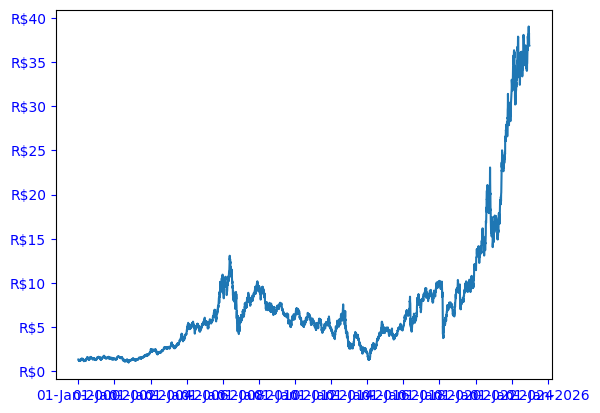

In [63]:
#* Exercício 98: Com os mesmos dados da Petrobras configure o eixo X para que o intervalo de tempo seja a cada dois anos. Além disso, mude o formato da data para dia-mes-ano.
import matplotlib.dates as mdate

fig, ax = plt.subplots()

ax.plot(cotacao.index, cotacao.values)
ax.yaxis.set_major_formatter('R${x:1.0f}')
myFmt = mdate.DateFormatter('%d-%b-%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdate.YearLocator(2))
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')

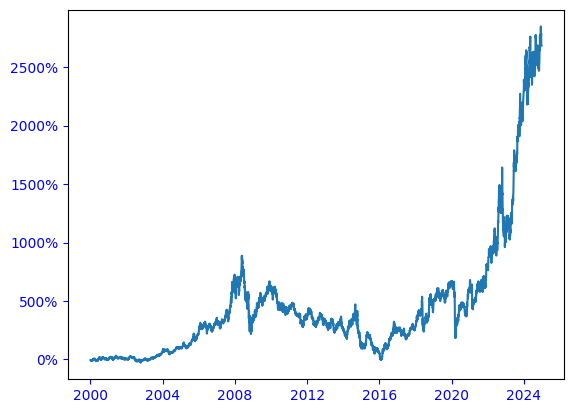

In [65]:
#* Exercício 99: Calcule a rentabilidade acumulada da Petrobras no período, crie um gráfico de performance e configure o eixo X como %.


retornos = cotacao.pct_change().dropna()

retornos_acumulados = (1 + retornos).cumprod() - 1

fig, ax = plt.subplots()

ax.plot(retornos_acumulados.index, retornos_acumulados.values)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.tick_params(axis='x', colors='b')
ax.tick_params(axis='y', colors='b')


# Mundo 9 - Cores: Como estilizar gráficos e configurar cores como o Picasso?

https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf

In [3]:
acao = "WEGE3.SA"
cotacoes = yf.download([acao])['Adj Close']

cotacoes

[*********************100%***********************]  1 of 1 completed


Ticker       WEGE3.SA
Date                 
2000-01-03   0.119719
2000-01-04   0.115518
2000-01-05   0.115518
2000-01-06   0.105016
2000-01-07   0.105016
...               ...
2024-12-18  56.968067
2024-12-19  56.378914
2024-12-20  55.460236
2024-12-23  54.240002
2024-12-26  54.360001

[6275 rows x 1 columns]

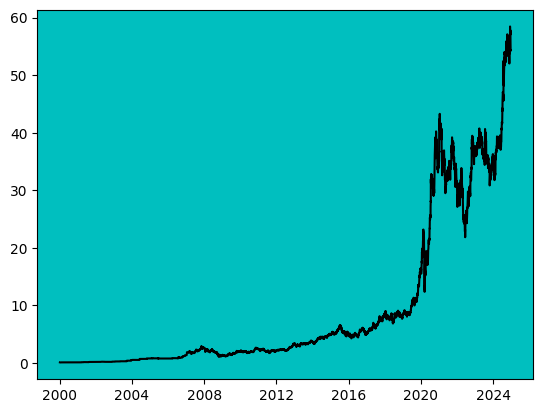

In [4]:
fig,ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color="black")
ax.set_facecolor('c')


# Cores por código
https://www.hexcolortool.com/#42eaf0

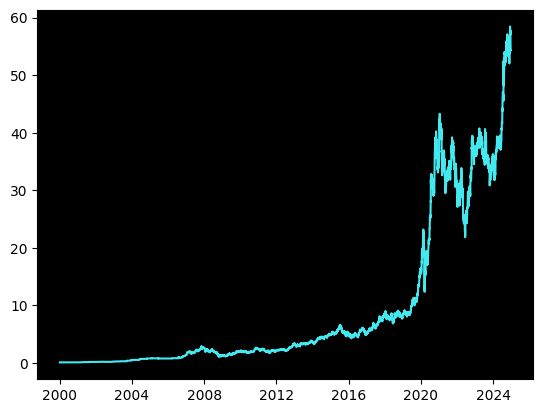

In [6]:
fig, ax = plt.subplots()
ax.plot(cotacoes.index, cotacoes.values, color="#42eaf0") 
ax.set_facecolor('black')

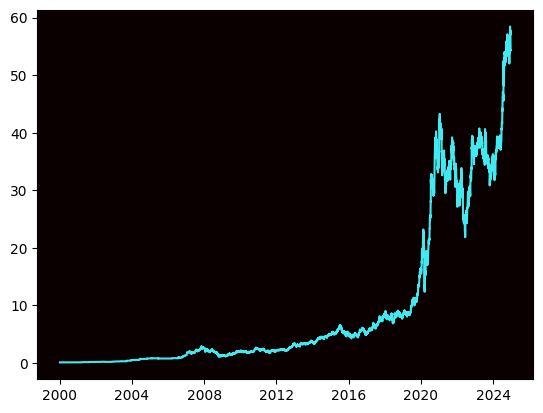

In [7]:
fig, ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values, color = (65/255, 234/255, 240/255))
ax.set_facecolor((10/255, 0/255, 0/255))

# Configurando cores por estilos

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html


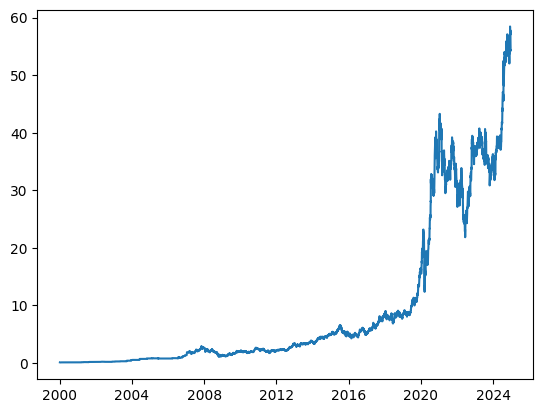

In [8]:
plt.style.use("default")


fig,ax = plt.subplots()

ax.plot(cotacoes.index, cotacoes.values)


In [9]:
!pip install -q mplcyberpunk

In [13]:
import mplcyberpunk

import matplotlib.ticker as mtick


plt.style.use("cyberpunk")



[*********************100%***********************]  2 of 2 completed


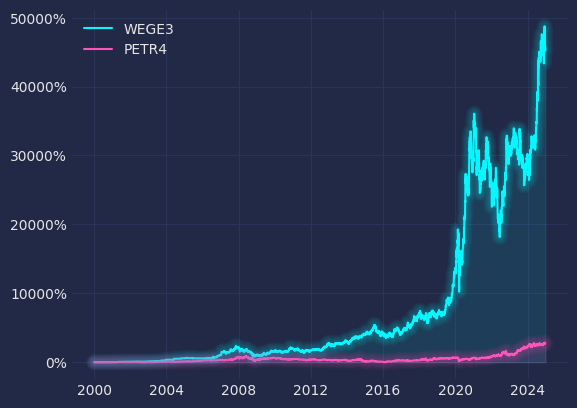

In [16]:
acoes = ["WEGE3.SA", "PETR4.SA"]
cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1 + retornos).cumprod() -1 

fif, ax = plt.subplots()


ax.plot(retornos_acum.index, retornos_acum['WEGE3.SA'], label = "WEGE3")
ax.plot(retornos_acum.index, retornos_acum['PETR4.SA'], label = "PETR4")

ax.legend()


ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

mplcyberpunk.add_glow_effects()

plt.show()





[*********************100%***********************]  4 of 4 completed


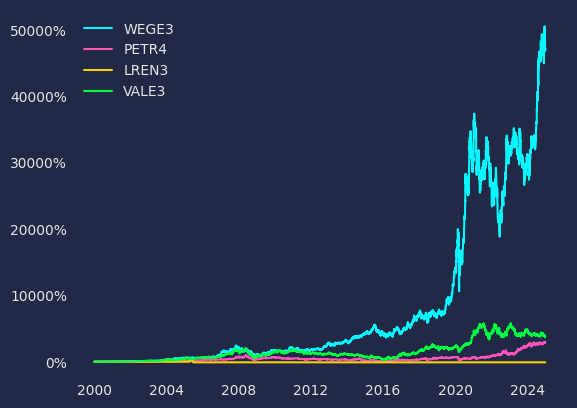

In [19]:
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA"]

cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

retornos_acum = (1+retornos).cumprod() - 1


fig, ax = plt.subplots()


for acao in acoes:
    ax.plot(retornos_acum.index, retornos_acum[acao], label = acao.replace(".SA",""))
    
ax.legend()

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(False)


plt.show()


# Exercícios

* Exercício 100: Puxe as cotações de 4 ações a sua escolha, calcule a correlação de 12 meses das ações com o ibovespa e plote um gráfico dessas correlações, escolhendo as cores das linhas a sua escolha.

* Exercício 101: Crie o mesmo gráfico utilizando o estilo Cyberpunk. 

[*********************100%***********************]  5 of 5 completed
/tmp/ipykernel_1202/2526252603.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = dados.pct_change().dropna()


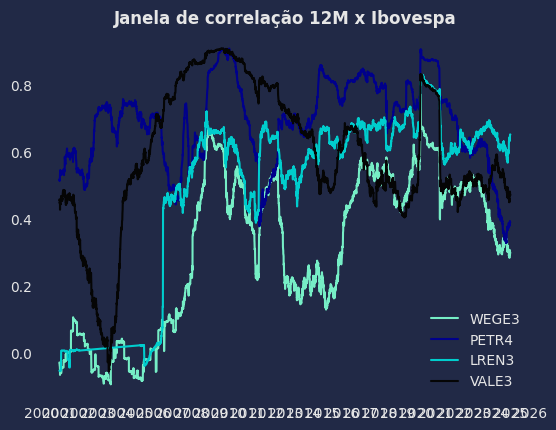

In [37]:
#* Exercício 100: Puxe as cotações de 4 ações a sua escolha, calcule a correlação de 12 meses das ações com o ibovespa e plote um gráfico dessas correlações, escolhendo as cores das linhas a sua escolha.
import matplotlib.dates as mdate
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

dados = yf.download(acoes,)['Adj Close']
#ibov = yf.download("^BVSP", start='2023-12-26', end="2024-12-26")['Adj Close']

retornos = dados.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")


cores = ["#76EEC6", "#00008B", "#00CDCD", "#050505"]

for i, acao in enumerate(acoes):
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label=acao.replace(".SA",""), color = cores[i])
    
ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight = "bold")

plt.show()








[*********************100%***********************]  5 of 5 completed
/tmp/ipykernel_1202/863491577.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = dados.pct_change().dropna()


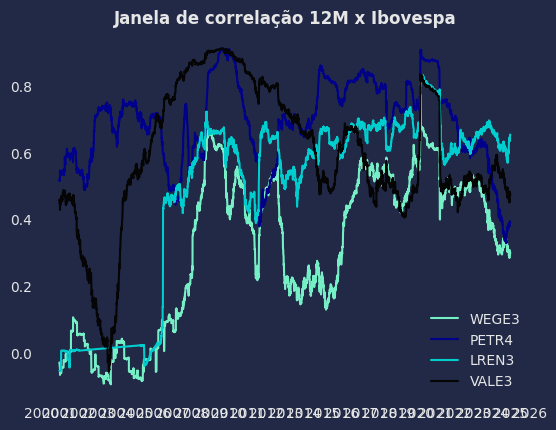

In [36]:
#* Exercício 101: Crie o mesmo gráfico utilizando o estilo Cyberpunk. 



import matplotlib.dates as mdate

plt.style.use("cyberpunk")
acoes = ["WEGE3.SA", "PETR4.SA", "LREN3.SA", "VALE3.SA", "^BVSP"]

dados = yf.download(acoes,)['Adj Close']
#ibov = yf.download("^BVSP", start='2023-12-26', end="2024-12-26")['Adj Close']

retornos = dados.pct_change().dropna()

fig, ax = plt.subplots()

acoes.remove("^BVSP")


cores = ["#76EEC6", "#00008B", "#00CDCD", "#050505"]

for i, acao in enumerate(acoes):
    janela_cor = retornos[acao].rolling(252).corr(retornos["^BVSP"]).dropna()
    ax.plot(janela_cor.index, janela_cor.values, label=acao.replace(".SA",""), color = cores[i])
    
ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.legend()
ax.grid(False)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight = "bold")

plt.show()



# Mundo 10 - Gráfico de Barras: Como criar um gráfico de barras com o retorno acumulado das empresas?

In [38]:
!pip install python-bcb

Defaulting to user installation because normal site-packages is not writeable


In [40]:
import matplotlib.pyplot 
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdate 
from datetime import datetime 
from datetime import timedelta  
from bcb import sgs 
import yfinance as yf 




In [42]:
params = {
    "ytick.color":"b",
    "xtick.color":"b",
    "axes.labelcolor":"b",
    "axes.edgecolor":"b",
    
}

plt.rcParams.update(params)




In [43]:
df_lucros = pd.DataFrame({"Weg": [2000, 3000, 5000, 6000],
                         "Petrobras": [150, 6000, 2000, 10000]}, 
                        index = ['1T', '2T', '3T', '4T'])

df_lucros

Weg  Petrobras
1T  2000        150
2T  3000       6000
3T  5000       2000
4T  6000      10000

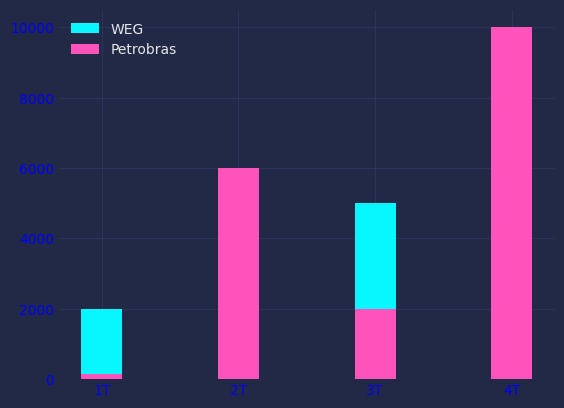

In [45]:
fig, ax = plt.subplots()

ax.bar(df_lucros.index, df_lucros.Weg.values, label="WEG", width=0.3, align='center' )
ax.bar(df_lucros.index, df_lucros.Petrobras.values, label="Petrobras", width=0.3 )

ax.legend()



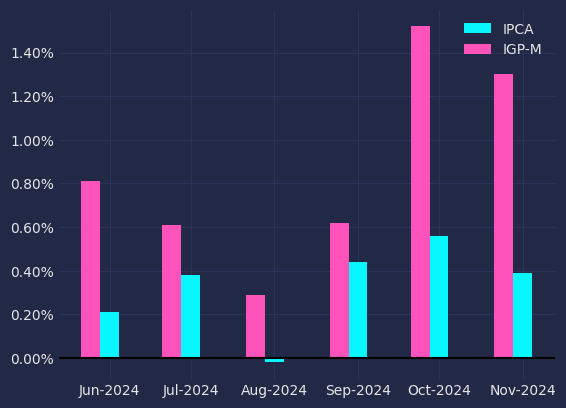

In [63]:
datas_numericas = mdate.date2num(inflacao.index)

fig, ax = plt.subplots()

ax.bar(datas_numericas, inflacao['ipca'], label = "IPCA", width=7)
ax.bar(datas_numericas - 7, inflacao['igp-m'], label = "IGP-M", width=7)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
myFmt = mdate.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis_date()

plt.axhline(y = 0, color = "black")


plt.legend()

plt.show()

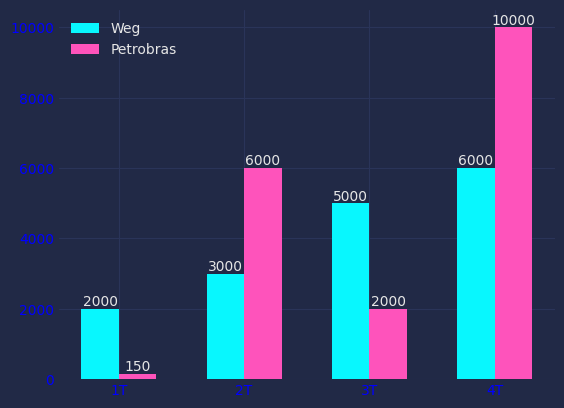

In [46]:
fig, ax = plt.subplots()

numero_de_trimestre = 4

posicao_barras = np.arange(numero_de_trimestre)
largura_barras = 0.3

barras = ax.bar(posicao_barras, df_lucros.Weg.values, label="Weg", width=largura_barras )
barras2 = ax.bar(posicao_barras + largura_barras, df_lucros.Petrobras.values, label="Petrobras", width=largura_barras )

plt.xticks(posicao_barras + largura_barras/2, tuple(df_lucros.index))

#adicionandp legenda de números

ax.bar_label(barras)
ax.bar_label(barras2)

plt.legend()

plt.show()




In [48]:
#ipcae igp 

inflacao = sgs.get({'ipca':433, 'igp-m':189}, start=datetime.now()-timedelta(180))

inflacao

ipca  igp-m
Date                   
2024-06-01  0.21   0.81
2024-07-01  0.38   0.61
2024-08-01 -0.02   0.29
2024-09-01  0.44   0.62
2024-10-01  0.56   1.52
2024-11-01  0.39   1.30

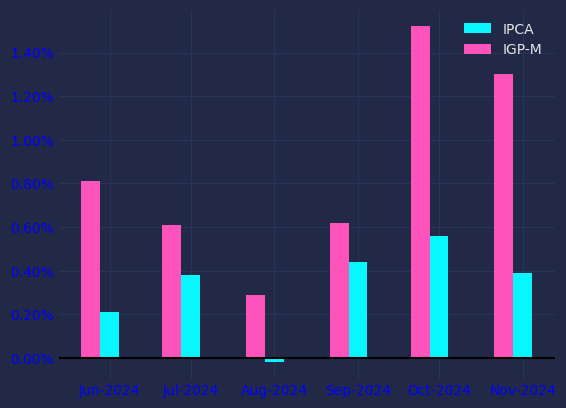

In [50]:
datas_numericas = mdate.date2num(inflacao.index)
fig, ax = plt.subplots()

ax.bar(datas_numericas, inflacao['ipca'], label="IPCA", width=7)
ax.bar(datas_numericas-7, inflacao['igp-m'], label="IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
myFmt = mdate.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis_date()

plt.axhline(y=0, color="black")


plt.legend()


plt.show()

# Exercícios 

* Exercício 102: Crie um gráfico de barras com o retorno acumulado da Ambev e do Ibovespa nos últimos 1, 3, 5 e 10 anos utilizando o estilo Cyberpunk.

In [60]:
#* Exercício 102: Crie um gráfico de barras com o retorno acumulado da Ambev e do Ibovespa nos últimos 1, 3, 5 e 10 anos utilizando o estilo Cyberpunk.
import mplcyberpunk
plt.style.use("cyberpunk")

cotacoes = yf.download(["^BVSP", "ABEV3.SA"], "2010-01-01")['Adj Close']

retornos = cotacoes.pct_change().dropna()

#retornos_acum = (1+retornos).cumprod() - 1


retornos_acumulados = (retornos + 1).cumprod() -1

retorno_1_ano = (cotacoes.pct_change(periods = 252).dropna()).iloc[-1,:]
retorno_3_anos = (cotacoes.pct_change(periods = 252*3).dropna()).iloc[-1, :]
retorno_5_anos = (cotacoes.pct_change(periods = 252*5).dropna()).iloc[-1, :]
retorno_10_anos = (cotacoes.pct_change(periods = 252*10).dropna()).iloc[-1, :]

valores_ibov = np.array([retorno_1_ano.iloc[0], retorno_3_anos.iloc[0], retorno_5_anos.iloc[0] , retorno_10_anos.iloc[0]])*100
valores_abev = np.array([retorno_1_ano.iloc[1], retorno_3_anos.iloc[1], retorno_5_anos.iloc[1], retorno_10_anos.iloc[1] ])*100




[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/2441804468.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = cotacoes.pct_change().dropna()
/tmp/ipykernel_1202/2441804468.py:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retorno_1_ano = (cotacoes.pct_change(periods = 252).dropna()).iloc[-1,:]
/tmp/ipykernel_1202/2441804468.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fi

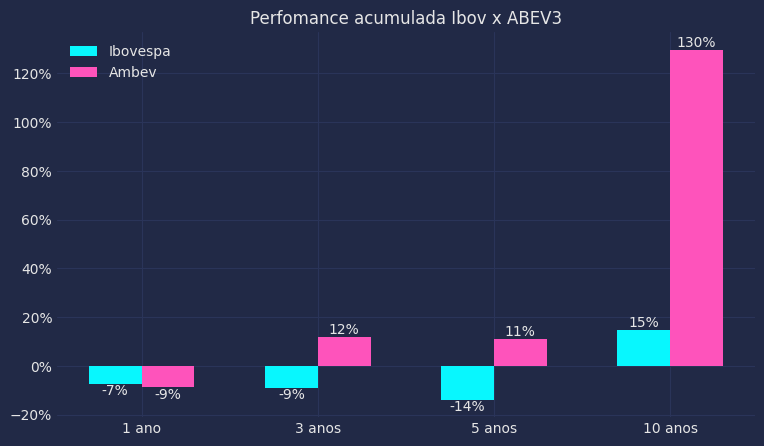

In [62]:
fig, ax = plt.subplots(figsize= (9,5))

numero_de_anos = 4

posicao_barras = np.arange(numero_de_anos)
largura_barras = 0.3

barras = ax.bar(posicao_barras, valores_ibov, label="Ibovespa", width = largura_barras)
barras2 = ax.bar(posicao_barras +largura_barras, valores_abev, label="Ambev", width = largura_barras)

plt.xticks(posicao_barras + largura_barras/2, ("1 ano", "3 anos", "5 anos", "10 anos"))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.bar_label(barras, fmt= "%.0f%%")
ax.bar_label(barras2, fmt= "%.0f%%")

plt.legend()

plt.title("Perfomance acumulada Ibov x ABEV3")

plt.show()

# Mundo 11 - Dispersão, Histograma e Boxsplot: Como plotar todo tipo de gráfico para qualquer dado financeiro?

In [70]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from bcb import sgs 
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime 
from datetime import timedelta 
import yfinance as yf 
import matplotlib as mpl 
import matplotlib.pylab as lab 
import mplcyberpunk



In [71]:
params = {
    "ytick.color": 'b',
    "xtick.color": 'b',
    "axes.labelcolor":"b",
    "axes.edgecolor":"b",
}

plt.rcParams.update(params)

In [73]:
cotacoes = yf.download(["WEGE3.SA"])["Adj Close"]
retornos_diarios = cotacoes.pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


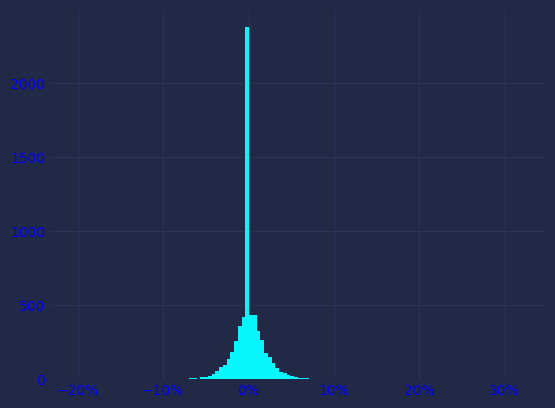

In [77]:
# histograma

fig, ax = plt.subplots()

ax.hist(retornos_diarios, bins=120)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()


In [79]:
acoes = ["WEGE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']

retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()
retornos_anuais['Ano'] = retornos_anuais.index.year 

retornos_anuais


[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/3790110971.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()


Ticker      WEGE3.SA     ^BVSP   Ano
Date                                
2001-12-31  0.652541 -0.110164  2001
2002-12-31  0.210257 -0.170128  2002
2003-12-31  1.118643  0.973376  2003
2004-12-31  0.530000  0.178090  2004
2005-12-31 -0.019607  0.277142  2005
2006-12-31  0.733334  0.329328  2006
2007-12-31  0.938462  0.436480  2007
2008-12-31 -0.493686 -0.412234  2008
2009-12-31  0.512027  0.826578  2009
2010-12-31  0.207582  0.010454  2010
2011-12-31 -0.112600 -0.181098  2011
2012-12-31  0.473643  0.073968  2012
2013-12-31  0.183595 -0.154958  2013
2014-12-31  0.304571 -0.029122  2014
2015-12-31  0.003351 -0.133121  2015
2016-12-31  0.063370  0.389319  2016
2017-12-31  0.585262  0.268567  2017
2018-12-31 -0.037392  0.150323  2018
2019-12-31  1.007021  0.319467  2019
2020-12-31  1.202822  0.028819  2020
2021-12-31 -0.119122 -0.121402  2021
2022-12-31  0.188505  0.049694  2022
2023-12-31 -0.025964  0.219520  2023
2024-12-31  0.507373 -0.097682  2024

In [80]:
plt.style.use("cyberpunk")

In [28]:
import matplotlib as mpl
import matplotlib.pylab as lab


def barra_discreta(vetor_categoria):
    
    cmap = lab.cm.cool  # define a cor
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'cmap escolhido', cmaplist, cmap.N)
    bounds = np.linspace(np.min(vetor_categoria), np.max(vetor_categoria) + 0.5, len(vetor_categoria) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    return bounds, norm

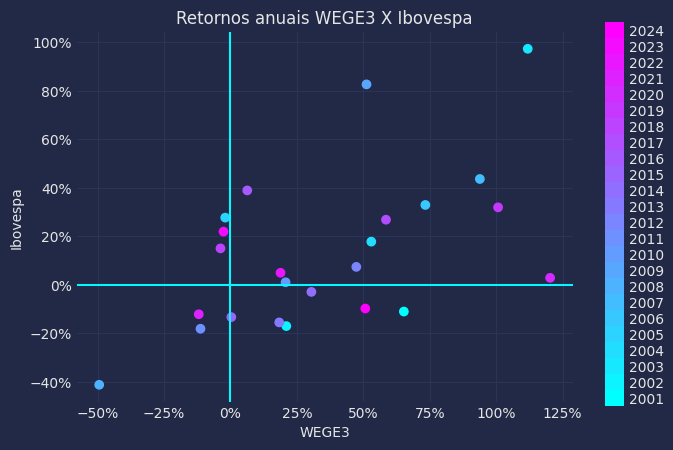

In [83]:
#Dispersão


fig, ax = plt.subplots()

ax.scatter(retornos_anuais['WEGE3.SA'], retornos_anuais['^BVSP'], c = retornos_anuais['Ano'], cmap="cool")

bounds, norm = barra_discreta(retornos_anuais['Ano'])

# cria um novo eixo pra barra


ax2 = fig.add_axes([0.95,0.1,0.03,0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm, spacing = 'proportional', ticks=bounds+0.5, boundaries=bounds, format="%1i")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

ax.set_ylabel("Ibovespa")
ax.set_xlabel("WEGE3")

ax.axhline(y=0)
ax.axvline(x=0)
ax.set_title("Retornos anuais WEGE3 X Ibovespa")

plt.show()


# Replique essa estrutura pra qualquer gráfico que você quiser.

É impossível cobrir 100% de tudo de gráficos, utilize o google ao seu favor!
No limite, a única diferença vai ser um "ax.scatter" para um "ax.boxsplot"

In [84]:
plt.style.use("default")

In [86]:
acoes = ["WEGE3.SA", "^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

retornos_mensais

[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/1000737271.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()


Ticker      WEGE3.SA     ^BVSP
Date                          
2000-02-29 -0.090910  0.077618
2000-03-31  0.000000  0.009060
2000-04-30  0.000000 -0.128058
2000-05-31 -0.049998 -0.037392
2000-06-30  0.000000  0.118406
...              ...       ...
2024-08-31  0.072930  0.065428
2024-09-30  0.005690 -0.030793
2024-10-31 -0.005148 -0.015954
2024-11-30 -0.003142 -0.031184
2024-12-31  0.014806 -0.036529

[299 rows x 2 columns]

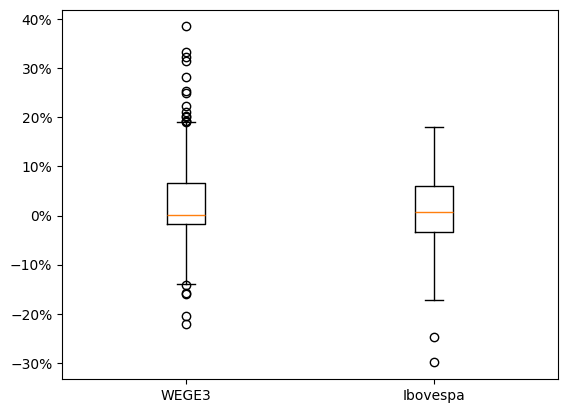

In [88]:
fig, ax = plt.subplots()

ax.boxplot(x = retornos_mensais)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax.set_xticks([1,2],["WEGE3", "Ibovespa"])

plt.show()


# Exercícios

* Exercício 103: Crie um histograma com os retornos mensais da Petrobras.
* Exercício 104: Crie um gráfico de dispersão com os retornos anuais do S&P500 contra o Ibovespa.


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1202/1102049561.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = dados.resample("M").last().pct_change().dropna()


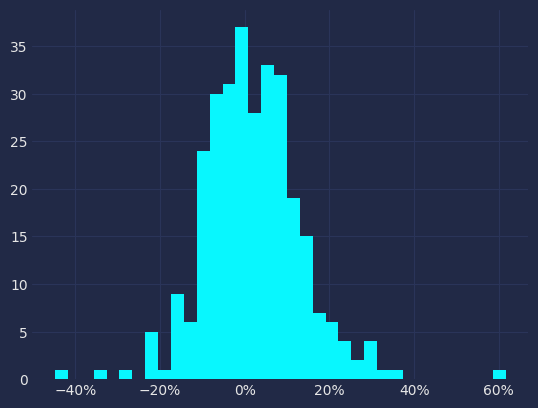

In [26]:
#* Exercício 103: Crie um histograma com os retornos mensais da Petrobras.
import yfinance as yf
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import matplotlib as mpl


acoes = ["PETR4.SA"]

dados = yf.download(acoes)['Adj Close']

retornos_mensais = dados.resample("M").last().pct_change().dropna()

retornos_mensais
fig, ax = plt.subplots()


ax.hist(retornos_mensais, bins=35)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.show()





In [32]:
#* Exercício 104: Crie um gráfico de dispersão com os retornos anuais do S&P500 contra o Ibovespa.
import yfinance as yf
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
#import mplcyberpunk
import mplcyberpunk
import matplotlib as mpl
import matplotlib as mpl
import matplotlib.pylab as lab
import numpy as np




#gabarito 104

plt.style.use("cyberpunk")

cotacoes = yf.download(["^GSPC", "^BVSP"])['Adj Close']

retornos_anuais = cotacoes.resample("y").last().pct_change().dropna()

retornos_anuais['Ano'] = retornos_anuais.index.year

[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/3533237459.py:22: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anuais = cotacoes.resample("y").last().pct_change().dropna()


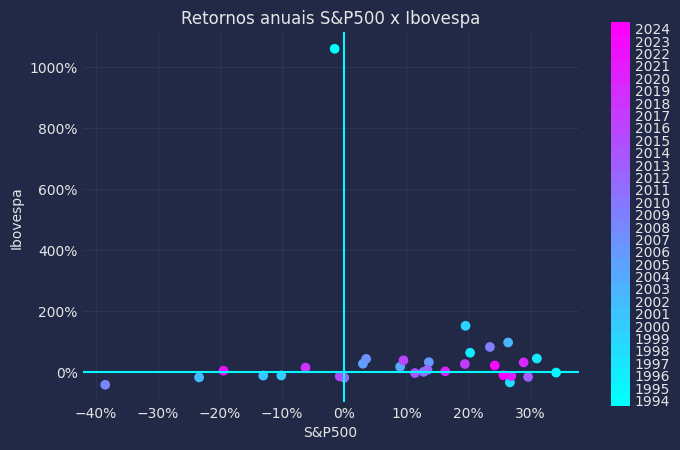

In [37]:
fig, ax = plt.subplots()


ax.scatter(retornos_anuais['^GSPC'], retornos_anuais["^BVSP"], c=retornos_anuais['Ano'] ,cmap="cool")

bounds,norm = barra_discreta(retornos_anuais['Ano'])

ax2 = fig.add_axes([0.95,0.1,0.03,0.8])

cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm, spacing='proportional', ticks=bounds + 0.5, boundaries=bounds, format='%1i')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.set_ylabel("Ibovespa")
ax.set_xlabel("S&P500")
ax.axhline(y = 0)
ax.axvline(x = 0)
ax.set_title("Retornos anuais S&P500 x Ibovespa")

plt.show()

# Mundo 12 - Seaborn: O que é e como utilizar esse outro pacote de gráficos?

# Mundo 12 - Seaborn

# O seaborn é outro pacotes de gráficos do Python.

Ele segue e compartilha a estrutura do Matplotlib, mas o único objetivo do seaborn é ser um pouco mais intuitivo e mais bonito "naturalmente"

In [38]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.0 MB/s eta 0:00:00a 0:00:01


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.ticker as mtick
import yfinance as yf 


In [43]:
params = {
    "ytick.color":"b",
    "xtick.color":"b",
    "axes.labelcolor": "b",
    "axes.edgecolor": "b",
}

plt.rcParams.update(params)

https://seaborn.pydata.org/generated/seaborn.boxplot.html

[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/2748376894.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()


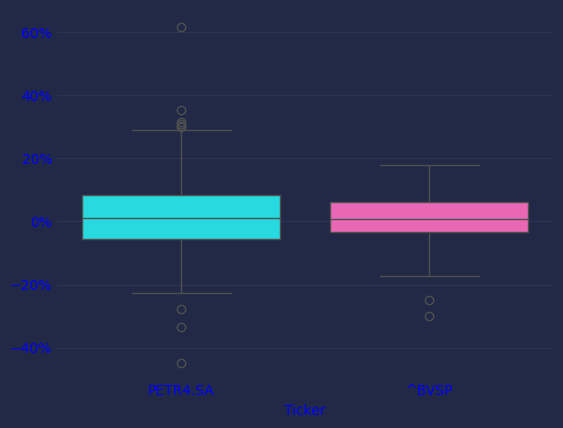

In [47]:
acoes = ["PETR4.SA","^BVSP"]

cotacoes = yf.download(acoes)['Adj Close']


retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

fig, ax = plt.subplots()

sns.boxplot(data = retornos_mensais, orient = "v")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()


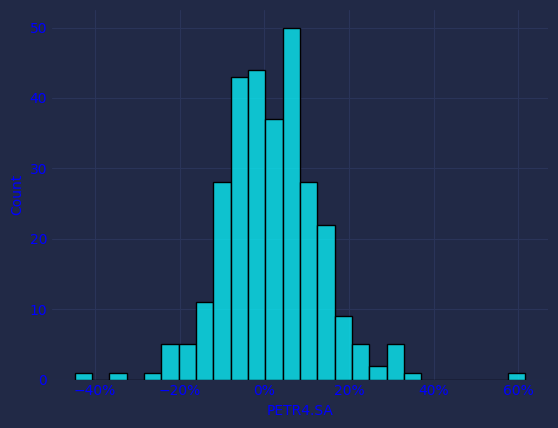

In [49]:
#histograma

fig,ax = plt.subplots()

sns.histplot(retornos_mensais['PETR4.SA'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()



[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/2819886510.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = cotacoes.pct_change().dropna()


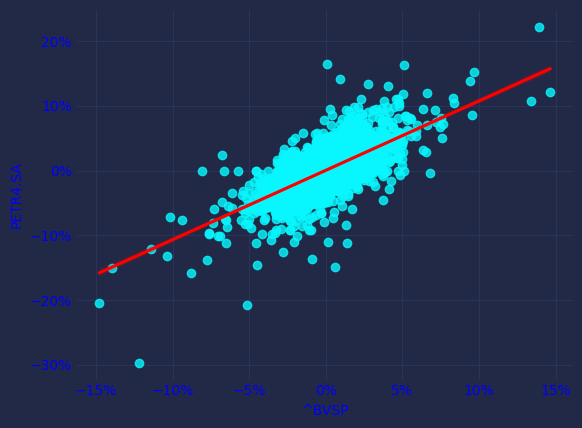

In [52]:
# regressão linear retornos PETR4 x IBOV
acoes = ["PETR4.SA", "^BVSP"]
cotacoes = yf.download(acoes)['Adj Close']
retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()

sns.regplot(x = retornos['^BVSP'], y = retornos['PETR4.SA'], line_kws= {"color":"red"})

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.show()

[*********************100%***********************]  2 of 2 completed


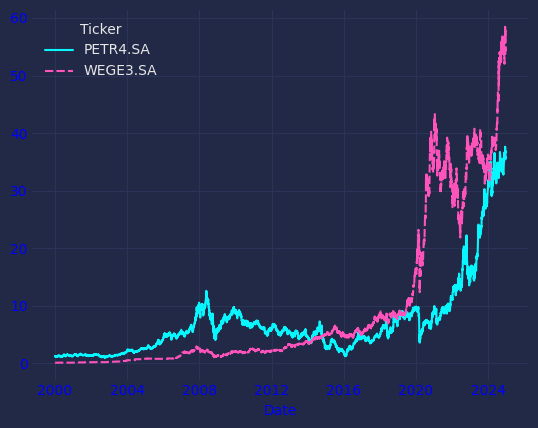

In [55]:
# grafico de linha
acoes = ["PETR4.SA", "WEGE3.SA"]
cotacoes = yf.download(acoes)['Adj Close']

fig, ax = plt.subplots()

sns.lineplot(data=cotacoes)

plt.show()

# Exercícios 

* Exercício 105: Crie um boxsplot utilizando o seaborn com os retornos mensais das empresas LREN3 e EQTL3.
* Exercício 106: Crie uma regressão linear com o seaborn entre os retornos de PETR3 e PETR4. 

[*********************100%***********************]  2 of 2 completed
/tmp/ipykernel_1202/2140059899.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()


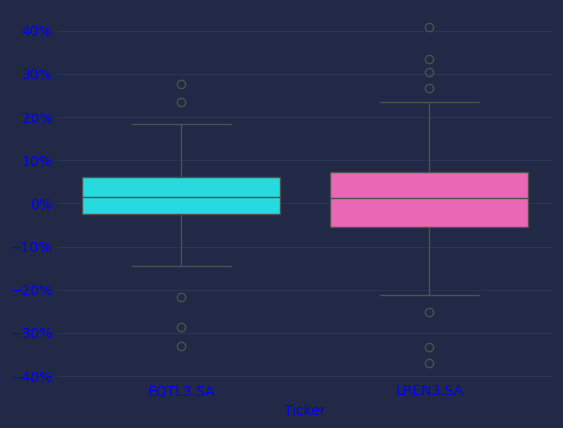

In [57]:
#* Exercício 105: Crie um boxsplot utilizando o seaborn com os retornos mensais das empresas LREN3 e EQTL3.
acoes = ["LREN3.SA", "EQTL3.SA"]

cotacoes = yf.download(acoes)['Adj Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

fig,ax = plt.subplots()

sns.boxplot(data=retornos_mensais, orient="v")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()

[*********************100%***********************]  2 of 2 completed


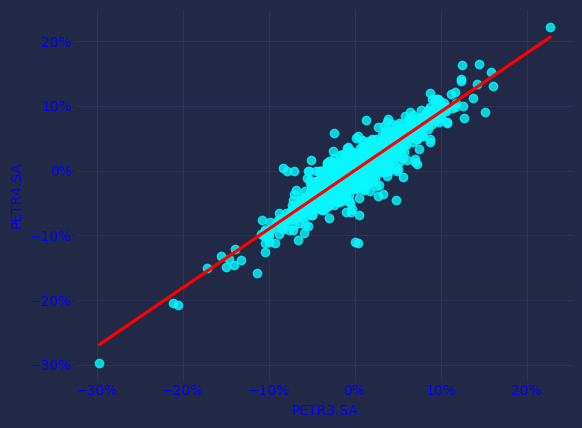

In [58]:
#* Exercício 106: Crie uma regressão linear com o seaborn entre os retornos de PETR3 e PETR4. 

acoes = ["PETR4.SA", "PETR3.SA"]
cotacoes = yf.download(acoes)['Adj Close']

retornos = cotacoes.pct_change().dropna()

fig, ax = plt.subplots()


sns.regplot(x=retornos['PETR3.SA'], y = retornos['PETR4.SA'], line_kws = {"color":"red"} )

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))

plt.show()

# Mundo 13 - Anotações: Como criar anotações em um gráfico de cotações que evidenciam o início de crises e eventos históricos?

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick 
import matplotlib.dates as mdate
import yfinance as yf 
from datetime import datetime

In [ ]:
params ={
    "ytick.color": "b",
    "xtick.color": "b",
    "axes.labelcolor": "b",
    "axes.edgecolor": 'b'
}

plt.rcParams.update(params)

In [64]:
acoes = ["^BVSP"]

cotacoes = yf.download(acoes, "2016-01-01", "2018-01-01")['Adj Close']

cotacoes

[*********************100%***********************]  1 of 1 completed


Ticker        ^BVSP
Date               
2016-01-04  42141.0
2016-01-05  42419.0
2016-01-06  41773.0
2016-01-07  40695.0
2016-01-08  40612.0
...             ...
2017-12-22  75187.0
2017-12-26  75688.0
2017-12-27  76073.0
2017-12-28  76402.0
2017-12-29  76402.0

[496 rows x 1 columns]

/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


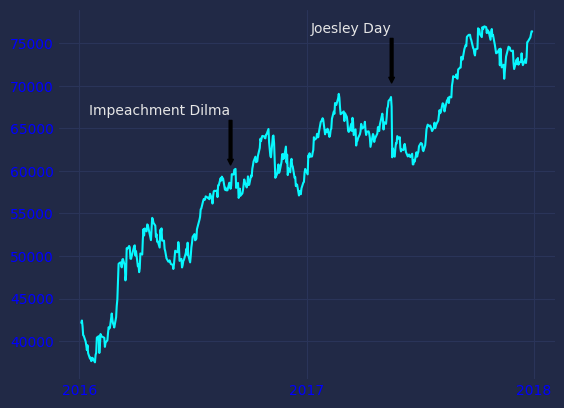

In [66]:
data_crises = [(datetime(2017, 5, 17), "Joesley Day"),
              (datetime(2016, 8, 31), "Impeachment Dilma")]
         


fig, ax = plt.subplots()

ax.plot(cotacoes)

for data, evento in data_crises:
    
    ax.annotate(evento, xy = (data, cotacoes.asof(data) + 2800), #posição comeco da seta
                xytext = (data, cotacoes.asof(data) + 10000), #posição texto da seta
                arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4),
               horizontalalignment = "right", verticalalignment = "top")

    
ax.xaxis.set_major_locator(mdate.YearLocator(1))

In [67]:
cotacoes.asof(datetime(2016,8,31))

Ticker
^BVSP    57901.0
Name: 2016-08-31 00:00:00, dtype: float64

In [68]:
cotacoes.loc[datetime(2016,8,31)]

Ticker
^BVSP    57901.0
Name: 2016-08-31 00:00:00, dtype: float64

# Exercícios

* Exercício 107: Crie um gráfico do ibovespa entre 2020 e 2022 com anotações no início da pandemia e inicío da guerra entre rússia e ucrânia. 

[*********************100%***********************]  1 of 1 completed


/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


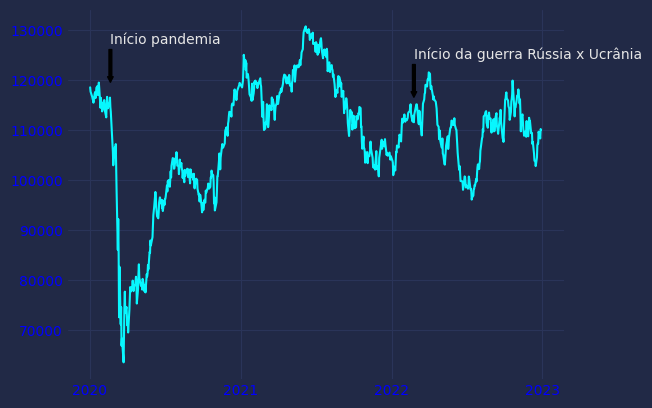

In [72]:
#* Exercício 107: Crie um gráfico do ibovespa entre 2020 e 2022 com anotações no início da pandemia e inicío da guerra entre rússia e ucrânia. 

#gabarito 107

cotacoes = yf.download(["^BVSP"], "2020-01-01", "2023-01-01")['Adj Close']

data_crises = [(datetime(2020, 2, 20), "Início pandemia"),
              (datetime(2022, 2, 24), "Início da guerra Rússia x Ucrânia")]
         


fig, ax = plt.subplots()

ax.plot(cotacoes)

for data, evento in data_crises:
    
    ax.annotate(evento, xy = (data, cotacoes.asof(data) + 5000), #posição comeco da seta
                xytext = (data, cotacoes.asof(data) + 15000), #posição texto da seta
                arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4),
               horizontalalignment = "left", verticalalignment = "top")

    
ax.xaxis.set_major_locator(mdate.YearLocator(1))

# Mundo 14 - Animações: Como criar gráficos animados que viram vídeos?

# Mundo 15 - Gráficos especiais - Mapa de calor Seaborn - Como criar um mapa de calor com o retorno por ativo e período?

In [74]:
## Mundo 15 - Gráficos especiais - Mapa de calor

import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import numpy as np 
import matplotlib.dates as mdate
import yfinance as yf 
from datetime import datetime 
import seaborn as sns


In [ ]:
params = {
    "ytick.color":"b",
    "xtick.color":"b",
    "axes.labelcolor": "b",
    "axes.edgecolor": "b",
}

plt.rcParams.update(params)

In [76]:
lista_acoes_inicial = ["WEGE3", "VALE3", "PETR4", "ABEV3", "IBOV"]

lista_acoes = [acao + ".SA" for acao in lista_acoes_inicial]

if( "IBOV.SA" in lista_acoes):
    lista_acoes.remove("IBOV.SA")
    lista_acoes.append("^BVSP")
if( "BTC.SA" in lista_acoes):
    lista_acoes.remove("BTC.SA")
    lista_acoes.append("BTC-USD")
    
    
cotacoes = yf.download(lista_acoes,"2008-12-28", "2023-01-01")['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [78]:
def janelas_moveis_retorno_acumulado(df, dias, anos):
    
    janela_movel = df.pct_change(periods = dias).dropna()
    
    lista_retornos = []
    
    for coluna in df.columns:
        media_retorno_acumulado = janela_movel[coluna].mean()
        valor_ao_ano = (1 +  media_retorno_acumulado)**(1/anos) - 1
        lista_retornos.append(valor_ao_ano)
        
    return lista_retornos
    
        

In [79]:
janela_1_ano_geral = janelas_moveis_retorno_acumulado(cotacoes,250,anos = 1)
janela_3_anos_geral = janelas_moveis_retorno_acumulado(cotacoes,250*3,anos = 3)
janela_5_anos_geral = janelas_moveis_retorno_acumulado(cotacoes,250*5,anos = 5)
janela_10_anos_geral = janelas_moveis_retorno_acumulado(cotacoes,250*10,anos = 10)


tabela_janelas_moveis = pd.DataFrame(
    data = {
        '1 ano': janela_1_ano_geral,
        '3 anos': janela_3_anos_geral,
        '5 anos': janela_5_anos_geral,
        '10 ano': janela_10_anos_geral
    },
    index = lista_acoes_inicial
)

for coluna in tabela_janelas_moveis.columns:
    tabela_janelas_moveis[f'{coluna}'] = tabela_janelas_moveis[f'{coluna}'].round(2) * 100
    
tabela_janelas_moveis



/tmp/ipykernel_1202/1184008921.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  janela_movel = df.pct_change(periods = dias).dropna()


1 ano  3 anos  5 anos  10 ano
WEGE3   17.0    16.0    15.0    13.0
VALE3   13.0    10.0    10.0     5.0
PETR4   20.0    18.0    19.0    10.0
ABEV3   31.0    32.0    29.0    28.0
IBOV     8.0     7.0     8.0     6.0

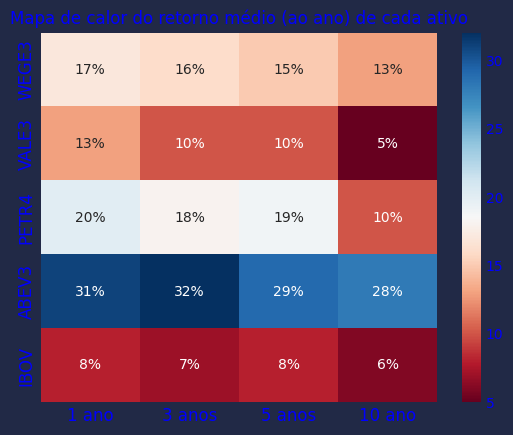

In [80]:
ax = sns.heatmap(tabela_janelas_moveis, annot=True, cmap="RdBu", fmt="g")

plt.title("Mapa de calor do retorno médio (ao ano) de cada ativo", color="b")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for t in ax.texts:
    t.set_text(t.get_text() + "%")
    
plt.show()
    
    


# Mundo 16 - Gráficos especiais - Mapa de calor Quantstats - Como criar uma lâmina mensal de retorno de um ativo em formato de mapa de calor?

In [81]:
!pip install quantstats

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 729.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.2 MB/s eta 0:00:0000:0100:01


In [82]:
import quantstats as qs 
import yfinance as yf 
import pandas as pd 

In [85]:
cotacoes = yf.download('PETR4.SA', '2008-12-28', '2023-01-01')['Adj Close']

retornos = cotacoes.resample("M").last().pct_change().dropna()

retornos

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1202/1078165531.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos = cotacoes.resample("M").last().pct_change().dropna()


Ticker      PETR4.SA
Date                
2009-01-31  0.095884
2009-02-28  0.054734
2009-03-31  0.081439
2009-04-30  0.046996
2009-05-31  0.166215
...              ...
2022-08-31  0.194980
2022-09-30 -0.103220
2022-10-31  0.000336
2022-11-30 -0.043190
2022-12-31 -0.081020

[168 rows x 1 columns]

/home/luiz/.local/lib/python3.10/site-packages/quantstats/stats.py:1011: UserWarning: Pandas DataFrame was passed (Series expected). Only first column will be used.
  warn(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


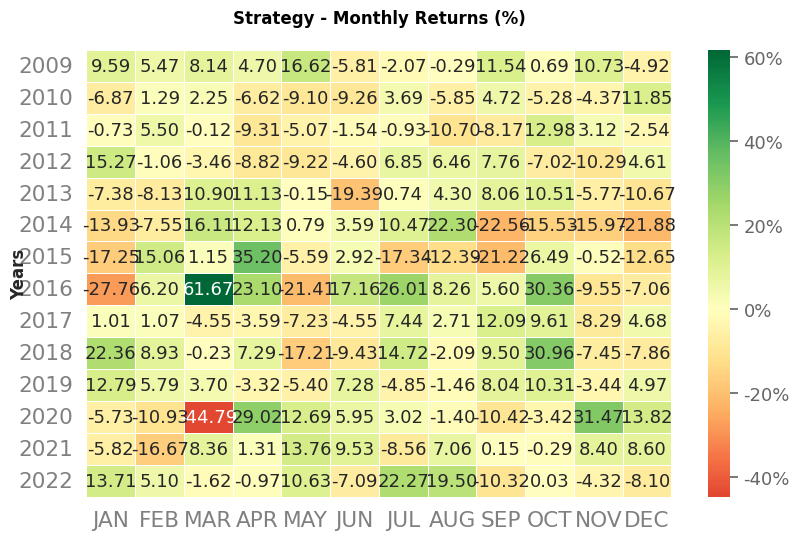

In [86]:
qs.extend_pandas()

retornos.plot_monthly_heatmap()

# Exercícios

* Exercício 110: Crie um mapa de calor com os retornos da WEGE3.

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_1202/1297640196.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos = cotacoes.resample("M").last().pct_change().dropna()
/home/luiz/.local/lib/python3.10/site-packages/quantstats/stats.py:1011: UserWarning: Pandas DataFrame was passed (Series expected). Only first column will be used.
  warn(
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


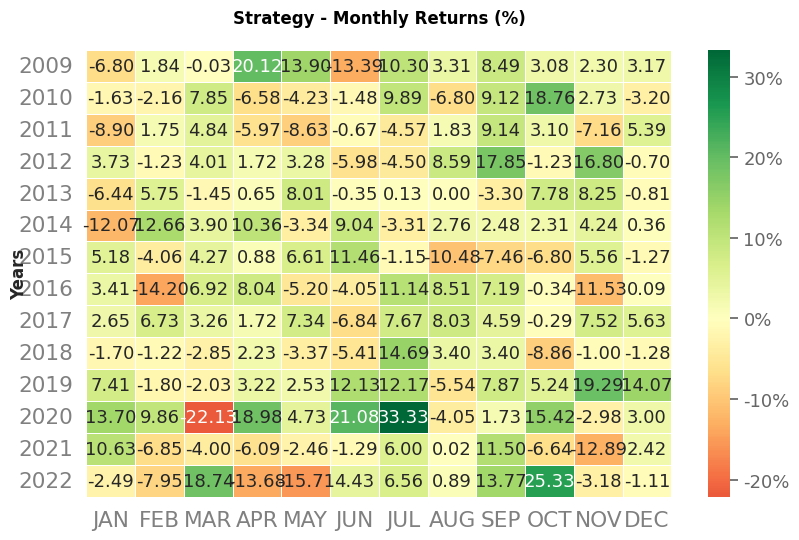

In [89]:
cotacoes = yf.download("WEGE3.SA", "2008-12-28", "2023-01-01")['Adj Close']

retornos = cotacoes.resample("M").last().pct_change().dropna()

qs.extend_pandas()


retornos.plot_monthly_heatmap()

# Materiais complementares